<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PRICE PREDICTION </strong></span></b> </div> 

### <b> <span style='color:#16C2D5'>|</span> Business Objectives</b>
1. Build a robust time series model leveraging market indicators to forecast future EABL stock prices. 
2. Investigate viability of investing in EABL stock prices. 
3. Build an anomally detection system to identify unusual or unexpected patterns in EABL stock prices. 

In [41]:
import pandas as pd 
import numpy as np
 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [42]:
import pandas as pd
df = pd.read_csv('Data/EABL-2006-2024_JAN_STOCKS.csv')
# Remove trailing spaces in column names
df.columns = df.columns.str.strip()
df.head()

Date    Open    High    Low  Close  Average  Volume
0  2024-01-31  104.00  111.00  104.0  110.0   106.00   42000
1  2024-01-30  105.00  105.00  101.0  104.0   104.00   15600
2  2024-01-29  105.00  105.00   99.0  103.5   100.00  596100
3  2024-01-26  116.25  116.25  100.0  100.0   104.50   60500
4  2024-01-25  119.75  120.00  118.0  118.0   118.25    5700

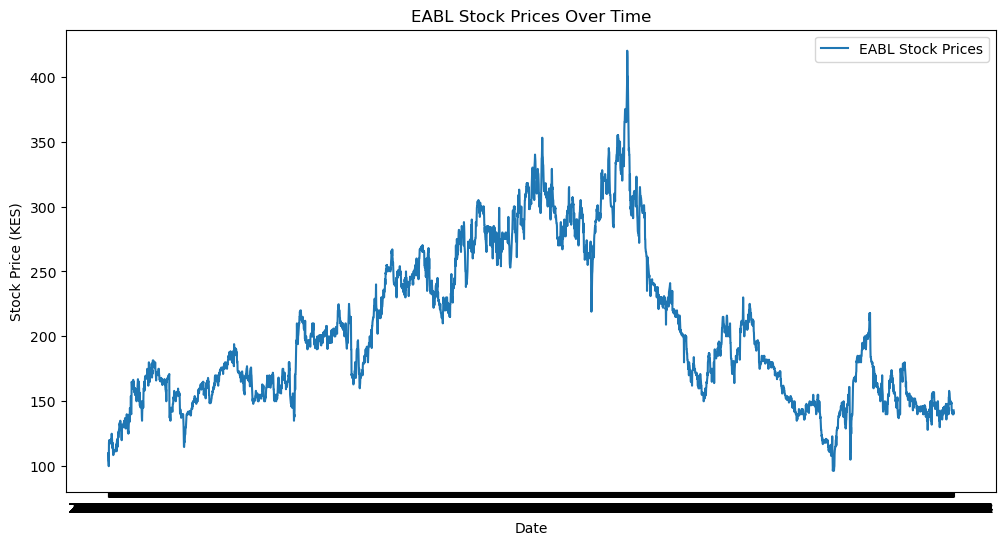

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='EABL Stock Prices')
plt.title('EABL Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price (KES)')
plt.legend()
plt.show()


In [44]:
# Extract day, month, and year from the 'Date' column.
# helps capture potential seasonality patterns

df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()


Date    Open    High    Low  Close  Average  Volume  Day  Month  Year
0 2024-01-31  104.00  111.00  104.0  110.0   106.00   42000   31      1  2024
1 2024-01-30  105.00  105.00  101.0  104.0   104.00   15600   30      1  2024
2 2024-01-29  105.00  105.00   99.0  103.5   100.00  596100   29      1  2024
3 2024-01-26  116.25  116.25  100.0  100.0   104.50   60500   26      1  2024
4 2024-01-25  119.75  120.00  118.0  118.0   118.25    5700   25      1  2024

In [45]:
# Calculate daily price changes and percentage changes.

df['Price_Diff'] = df['Close'].diff()
df['Price_Percent_Change'] = df['Close'].pct_change() * 100
df.head()

Date    Open    High    Low  Close  Average  Volume  Day  Month  Year  \
0 2024-01-31  104.00  111.00  104.0  110.0   106.00   42000   31      1  2024   
1 2024-01-30  105.00  105.00  101.0  104.0   104.00   15600   30      1  2024   
2 2024-01-29  105.00  105.00   99.0  103.5   100.00  596100   29      1  2024   
3 2024-01-26  116.25  116.25  100.0  100.0   104.50   60500   26      1  2024   
4 2024-01-25  119.75  120.00  118.0  118.0   118.25    5700   25      1  2024   

   Price_Diff  Price_Percent_Change  
0         NaN                   NaN  
1        -6.0             -5.454545  
2        -0.5             -0.480769  
3        -3.5             -3.381643  
4        18.0             18.000000

In [46]:
# moving averages for different windows to smooth out fluctuations
# 7-day, 30-day)
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()


In [47]:
# standard deviation to capture volatility
# 7-day MA crossing above 30-day MA
df['Volatility'] = df['Close'].pct_change().rolling(window=7).std()


In [48]:
# binary signals based on price crossovers
df['Signal'] = 0
df.loc[df['MA_7'] > df['MA_30'], 'Signal'] = 1
df.loc[df['MA_7'] < df['MA_30'], 'Signal'] = -1


In [49]:
df.head(15)

Date    Open    High     Low  Close  Average  Volume  Day  Month  \
0  2024-01-31  104.00  111.00  104.00  110.0   106.00   42000   31      1   
1  2024-01-30  105.00  105.00  101.00  104.0   104.00   15600   30      1   
2  2024-01-29  105.00  105.00   99.00  103.5   100.00  596100   29      1   
3  2024-01-26  116.25  116.25  100.00  100.0   104.50   60500   26      1   
4  2024-01-25  119.75  120.00  118.00  118.0   118.25    5700   25      1   
5  2024-01-24  115.00  120.00  115.00  120.0   116.50    9700   24      1   
6  2024-01-23  117.00  117.00  117.00  117.0   117.00    1200   23      1   
7  2024-01-22  118.00  123.00  115.25  117.0   117.00     900   22      1   
8  2024-01-19  118.00  118.00  118.00  118.0   118.00    3200   19      1   
9  2024-01-18  118.00  124.75  118.00  120.0   120.00  263800   18      1   
10 2024-01-17  120.00  120.00  119.00  120.0   119.75    2700   17      1   
11 2024-01-16  120.00  125.00  119.00  120.0   121.75   17800   16      1   
12 2024-01-15  120.00  120.00  119.00  119.5   120.00   13000   15      1   
13 2024-01-12  120.00  120.00  119.50  120.0   120.00    8300   12      1   
14 2024-01-11  121.00  121.00  120.00  120.0   120.75    4600   11      1   

    Year  Price_Diff  Price_Percent_Change        MA_7  MA_30  Volatility  \
0   2024         NaN                   NaN         NaN    NaN         NaN   
1   2024        -6.0             -5.454545         NaN    NaN         NaN   
2   2024        -0.5             -0.480769         NaN    NaN         NaN   
3   2024        -3.5             -3.381643         NaN    NaN         NaN   
4   2024        18.0             18.000000         NaN    NaN         NaN   
5   2024         2.0              1.694915         NaN    NaN         NaN   
6   2024        -3.0             -2.500000  110.357143    NaN         NaN   
7   2024         0.0              0.000000  111.357143    NaN    0.078068   
8   2024         1.0              0.854701  113.357143    NaN    0.072660   
9   2024         2.0              1.694915  115.714286    NaN    0.071869   
10  2024         0.0              0.000000  118.571429    NaN    0.068439   
11  2024         0.0              0.000000  118.857143    NaN    0.014313   
12  2024        -0.5             -0.416667  118.785714    NaN    0.012915   
13  2024         0.5              0.418410  119.214286    NaN    0.007097   
14  2024         0.0              0.000000  119.642857    NaN    0.007097   

    Signal  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  
9        0  
10       0  
11       0  
12       0  
13       0  
14       0

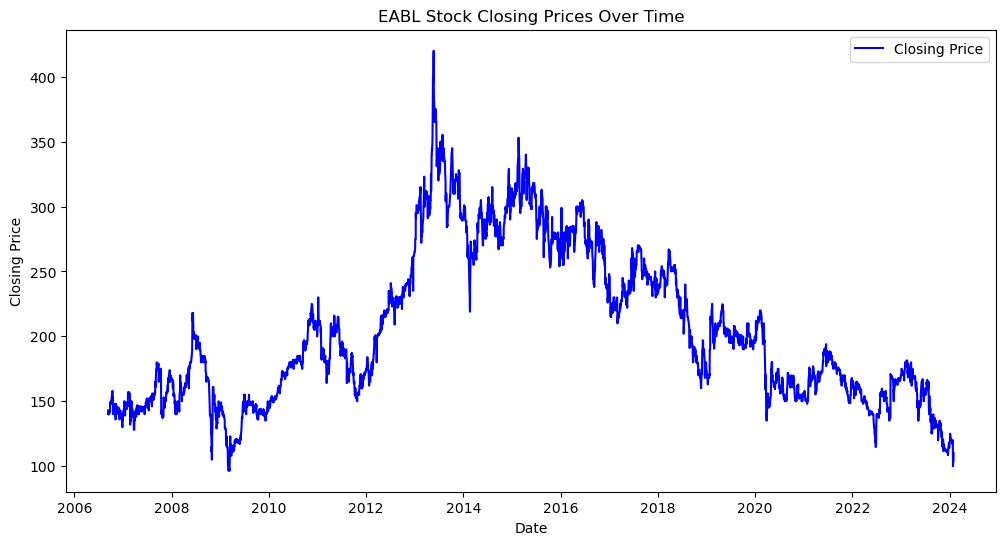

In [50]:
# Plot the closing prices over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('EABL Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [51]:
# Plot the daily price differences.
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='EABL Stock Candlestick Chart')
fig.show()


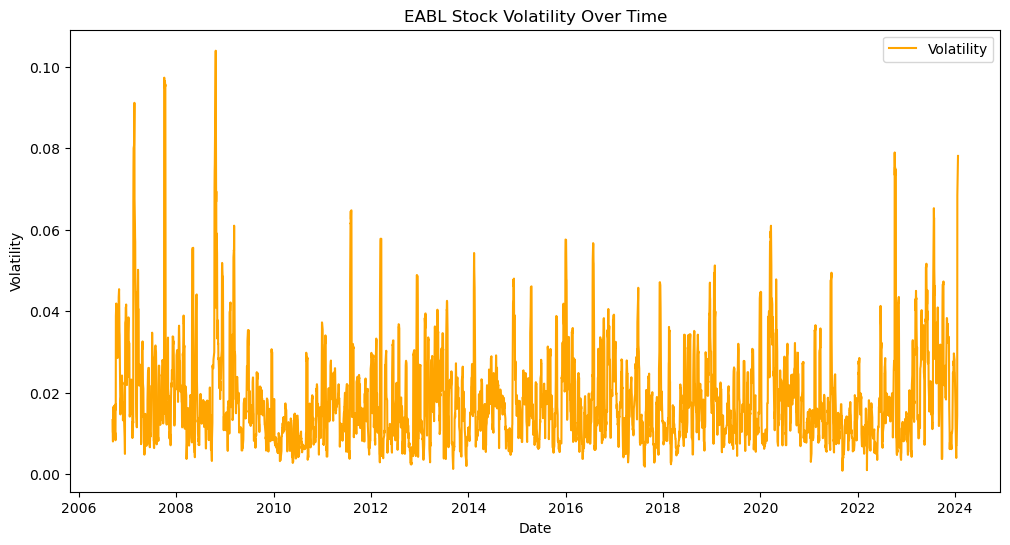

In [52]:
# Plot the volatility over time.
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='orange')
plt.title('EABL Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

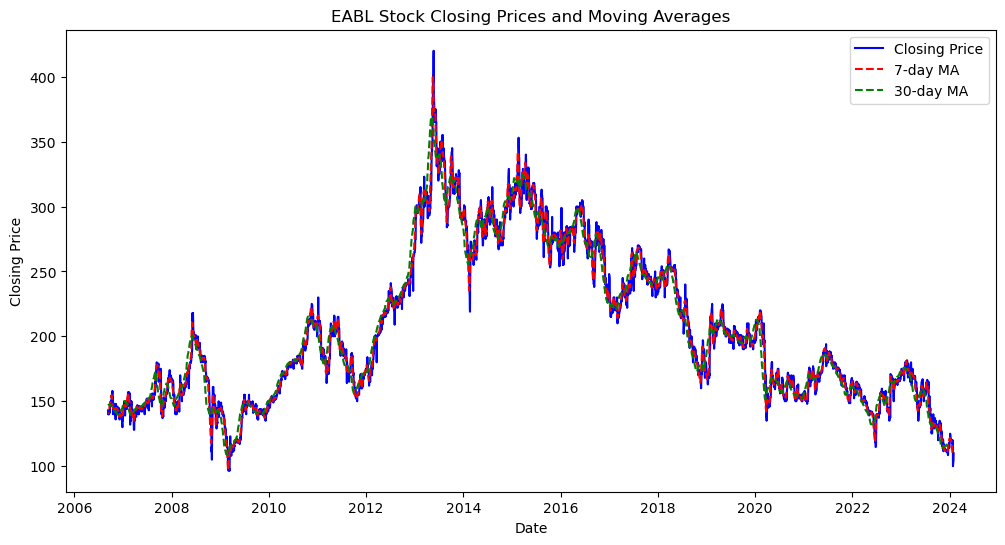

In [53]:
# Plot the closing prices along with moving averages

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['MA_7'], label='7-day MA', color='red', linestyle='--')
plt.plot(df['Date'], df['MA_30'], label='30-day MA', color='green', linestyle='--')
plt.title('EABL Stock Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


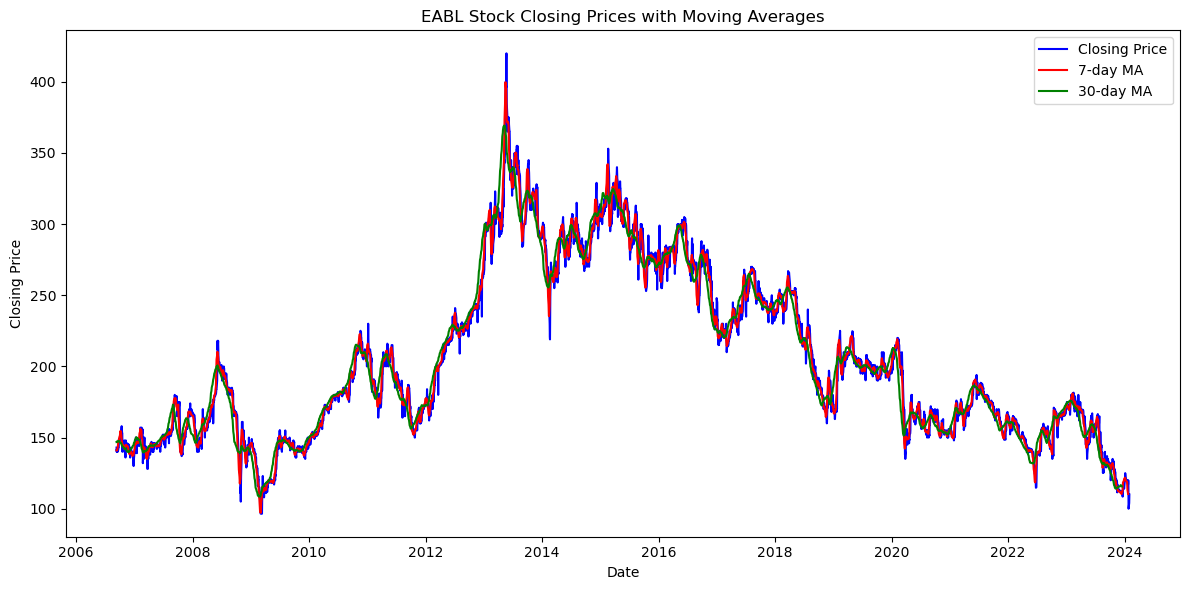

In [54]:
# Time Series Plot with Trendline

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df, label='Closing Price', color='blue')
sns.lineplot(x='Date', y='MA_7', data=df, label='7-day MA', color='red')
sns.lineplot(x='Date', y='MA_30', data=df, label='30-day MA', color='green')
plt.title('EABL Stock Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()


In [55]:
# Candlestick Plot with Plotly Express

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='EABL Stock Candlestick Chart')
fig.show()



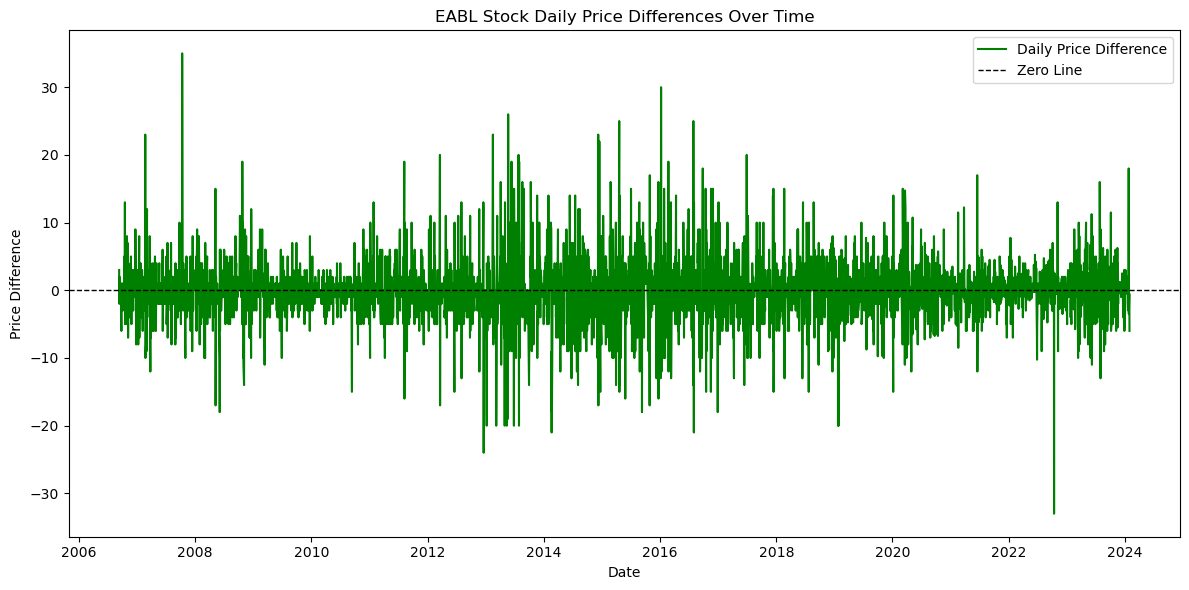

In [56]:
# Price Difference Plot with Horizontal Line
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price_Diff', data=df, label='Daily Price Difference', color='green')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Zero Line')
plt.title('EABL Stock Daily Price Differences Over Time')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.tight_layout()
plt.show()


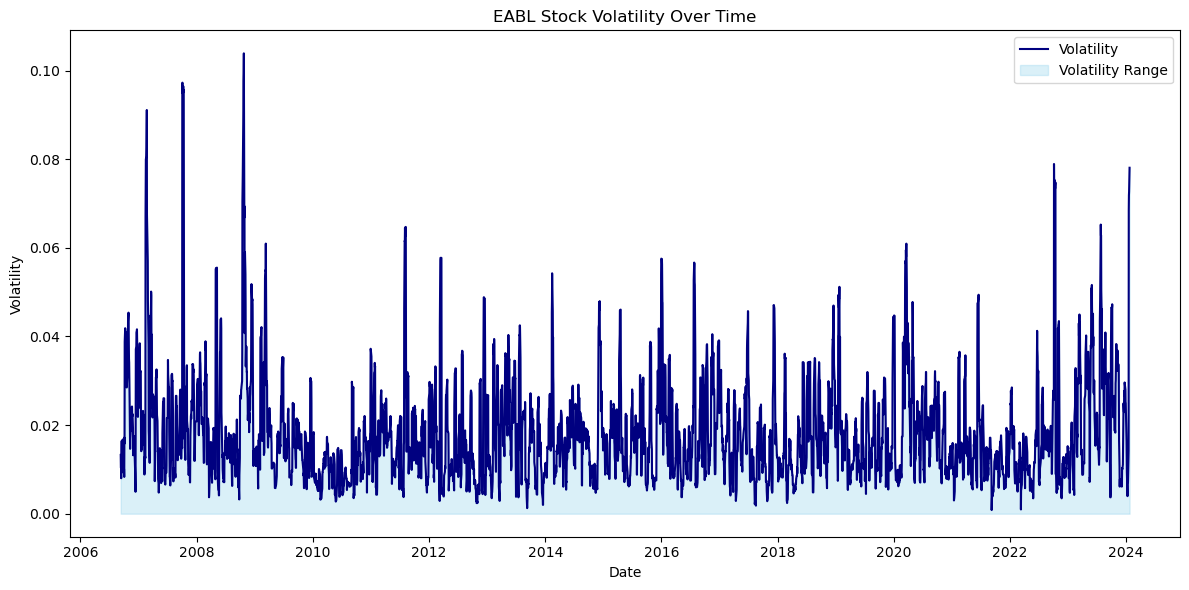

In [57]:
# Volatility Plot with Shaded Regions
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volatility', data=df, label='Volatility', color='navy')
plt.fill_between(df['Date'], 0, df['Volatility'], color='skyblue', alpha=0.3, label='Volatility Range')
plt.title('EABL Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()



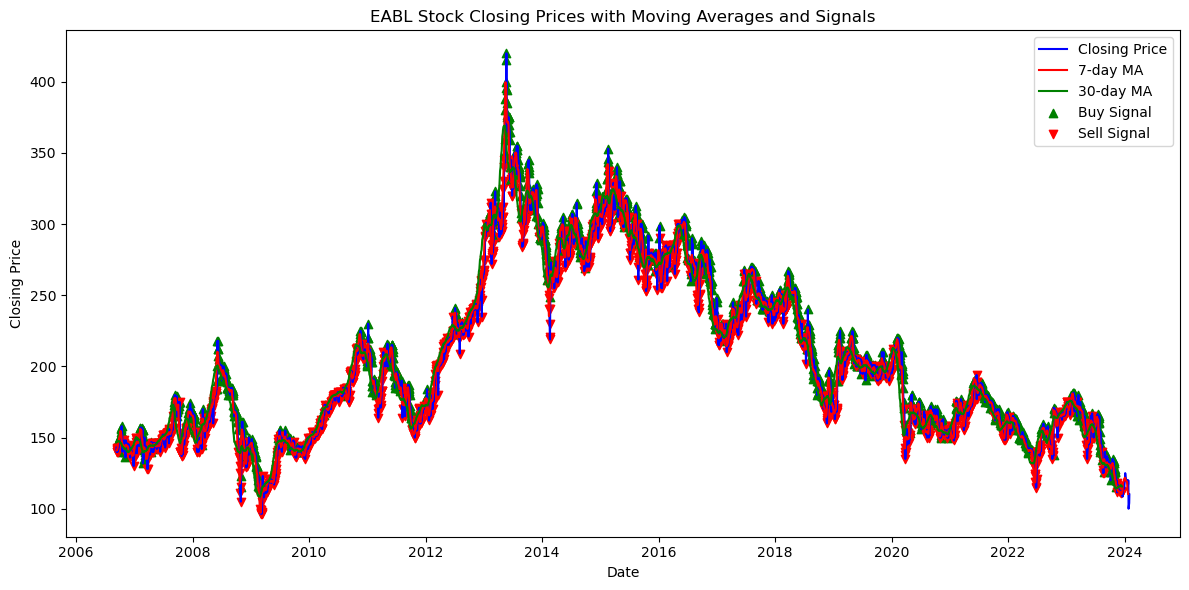

In [58]:
# Moving Averages Plot with Highlighted Signal Points
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df, label='Closing Price', color='blue')
sns.lineplot(x='Date', y='MA_7', data=df, label='7-day MA', color='red')
sns.lineplot(x='Date', y='MA_30', data=df, label='30-day MA', color='green')
plt.scatter(df.loc[df['Signal'] == 1, 'Date'], df.loc[df['Signal'] == 1, 'Close'], marker='^', color='green', label='Buy Signal')
plt.scatter(df.loc[df['Signal'] == -1, 'Date'], df.loc[df['Signal'] == -1, 'Close'], marker='v', color='red', label='Sell Signal')
plt.title('EABL Stock Closing Prices with Moving Averages and Signals')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_364\1412753668.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



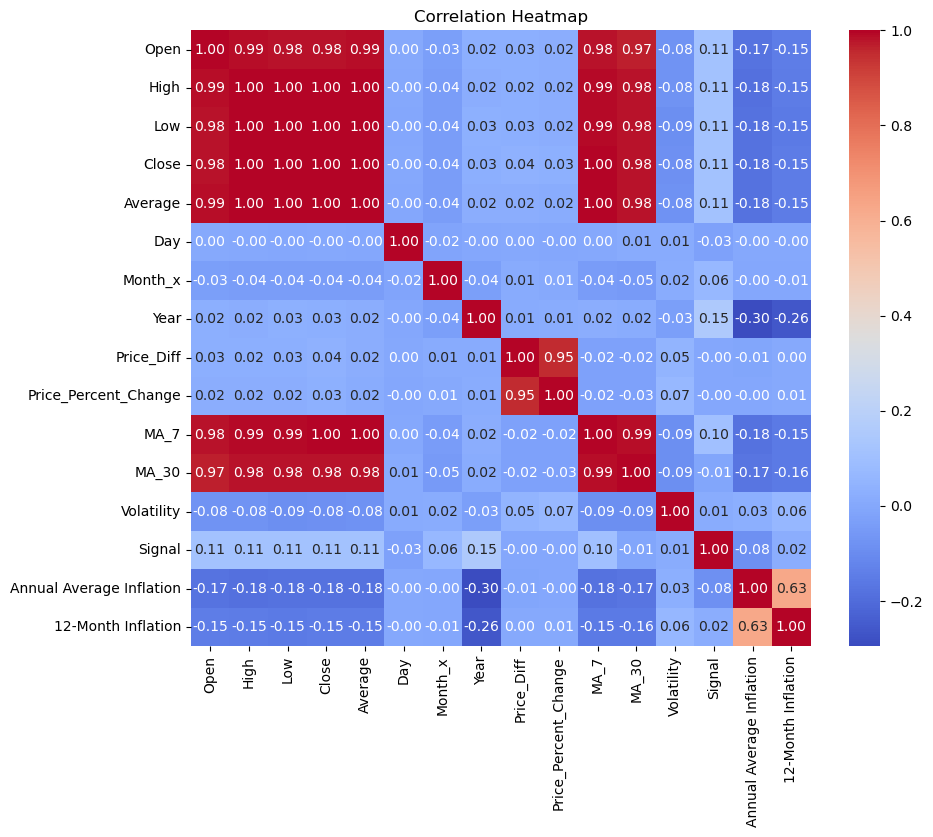

In [59]:
import seaborn as sns

merged_df = pd.merge(df, df1, on='Year', how='inner')  # Merge with the appropriate dataframe
correlation_matrix = merged_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [60]:
import pandas as pd
df1 = pd.read_csv('Data/Inflation Rates.csv')
df1.head()

Year      Month  Annual Average Inflation  12-Month Inflation
0  2023   December                      7.67                6.63
1  2023   November                      7.87                6.80
2  2023    October                      8.10                6.92
3  2023  September                      8.32                6.78
4  2023     August                      8.52                6.73

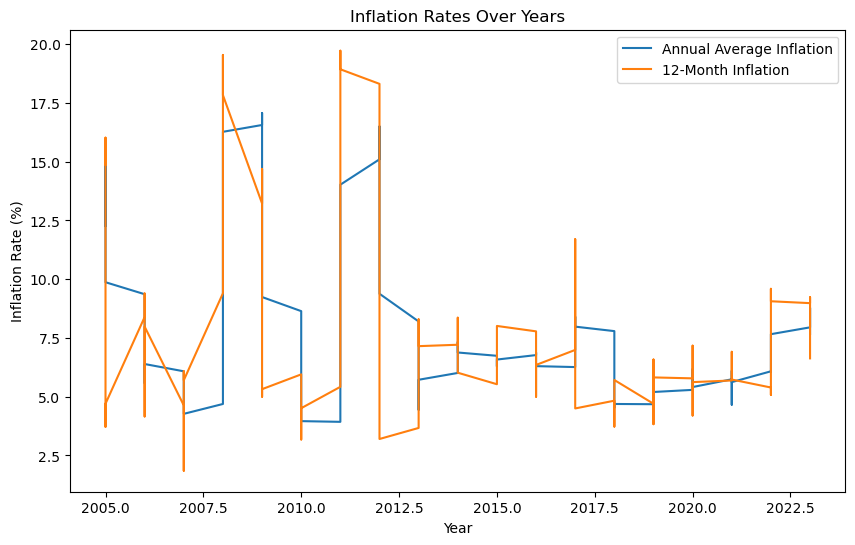

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(df1['Year'], df1['Annual Average Inflation'], label='Annual Average Inflation')
plt.plot(df1['Year'], df1['12-Month Inflation'], label='12-Month Inflation')
plt.title('Inflation Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.show()


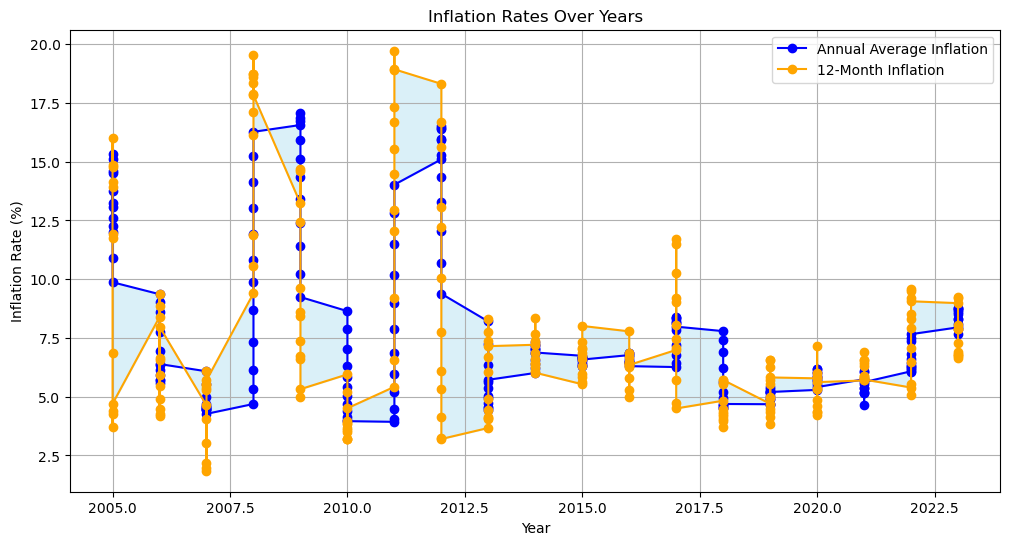

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df1['Year'], df1['Annual Average Inflation'], label='Annual Average Inflation', marker='o', color='blue')
plt.plot(df1['Year'], df1['12-Month Inflation'], label='12-Month Inflation', marker='o', color='orange')

# Shaded area between the two lines
plt.fill_between(df1['Year'], df1['Annual Average Inflation'], df1['12-Month Inflation'], color='skyblue', alpha=0.3)

plt.title('Inflation Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


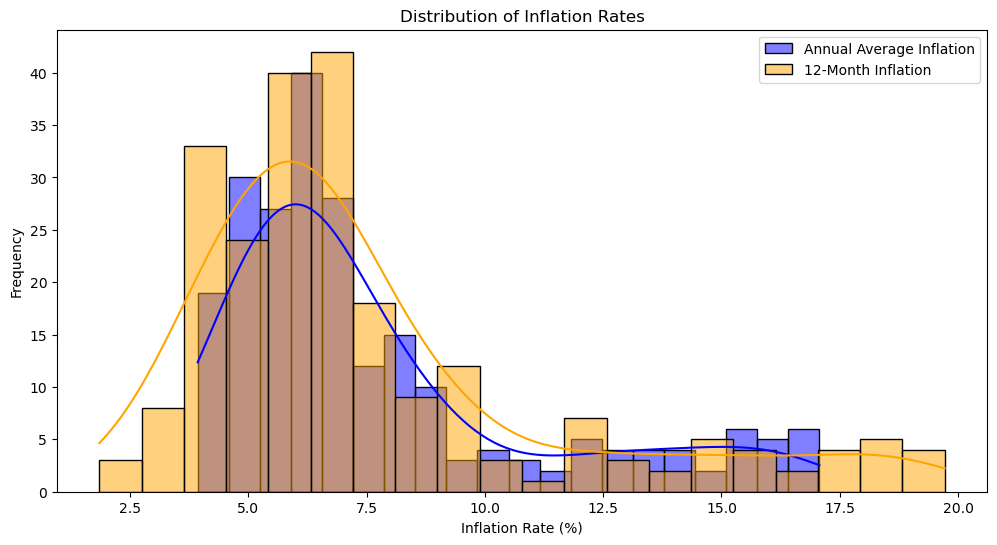

In [63]:
# Distribution of Annual Average Inflation and 12-Month Inflation
plt.figure(figsize=(12, 6))
sns.histplot(df1['Annual Average Inflation'], bins=20, kde=True, color='blue', label='Annual Average Inflation')
sns.histplot(df1['12-Month Inflation'], bins=20, kde=True, color='orange', label='12-Month Inflation')
plt.title('Distribution of Inflation Rates')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [64]:
import pandas as pd
df2 = pd.read_csv('Data/Annual GDP.csv')
df2.head()

Year Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
0  2022                       13,483,003                    4.8   
1  2021                       12,027,662                    7.6   
2  2020                       10,715,070                   -0.3   
3  2019                       10,237,727                    5.1   
4  2018                        9,340,307                    5.6   

  Real GDP prices (Ksh Million)  
0                     9,851,329  
1                     9,395,942  
2                     8,733,060  
3                     8,756,946  
4                     8,330,891

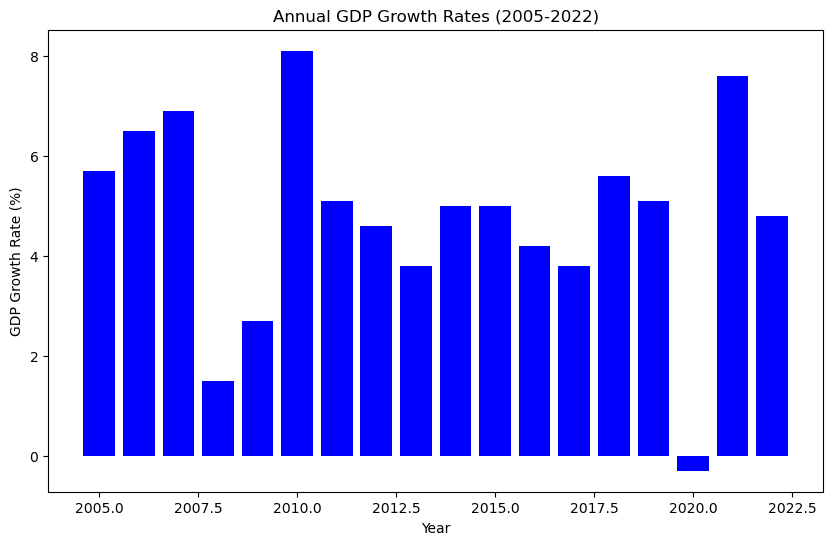

In [65]:
import matplotlib.pyplot as plt

# Filter the data for the years 2005 to 2022
filtered_df2 = df2[(df2['Year'] >= 2005) & (df2['Year'] <= 2022)]

plt.figure(figsize=(10, 6))
plt.bar(filtered_df2['Year'], filtered_df2['Annual GDP growth (%)'], color='blue')
plt.title('Annual GDP Growth Rates (2005-2022)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.show()



In [66]:
# Convert 'Nominal GDP prices' and 'Real GDP prices' to numeric
df2['Nominal GDP prices (Ksh Million)'] = pd.to_numeric(df2['Nominal GDP prices (Ksh Million)'].str.replace(',', ''))
df2['Real GDP prices (Ksh Million)'] = pd.to_numeric(df2['Real GDP prices (Ksh Million)'].str.replace(',', ''))

# Feature Engineering: GDP Growth Rate
df2['GDP Growth Rate'] = df2['Annual GDP growth (%)'] / 100

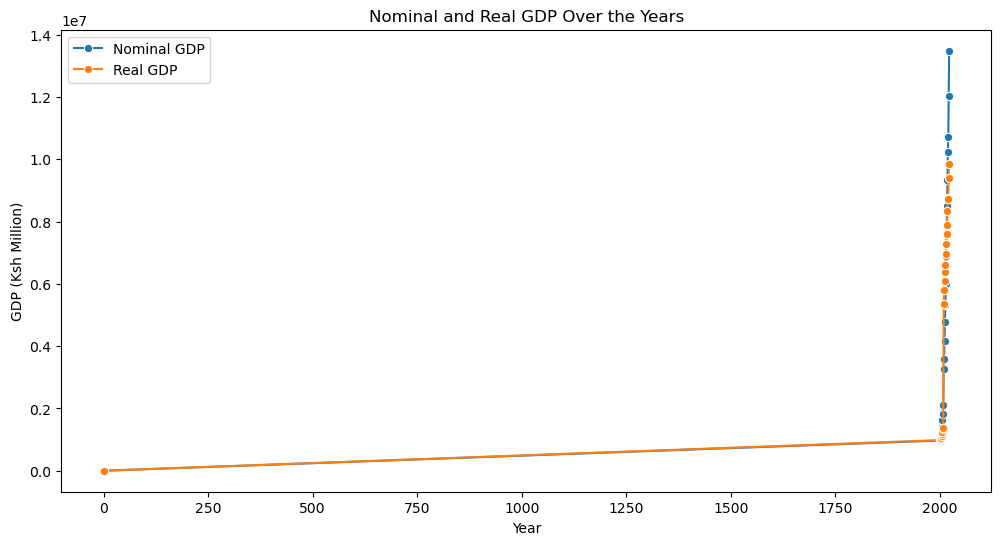

In [67]:
# Line plot for Nominal and Real GDP over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Nominal GDP prices (Ksh Million)', data=df2, marker='o', label='Nominal GDP')
sns.lineplot(x='Year', y='Real GDP prices (Ksh Million)', data=df2, marker='o', label='Real GDP')
plt.title('Nominal and Real GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (Ksh Million)')
plt.legend()
plt.show()

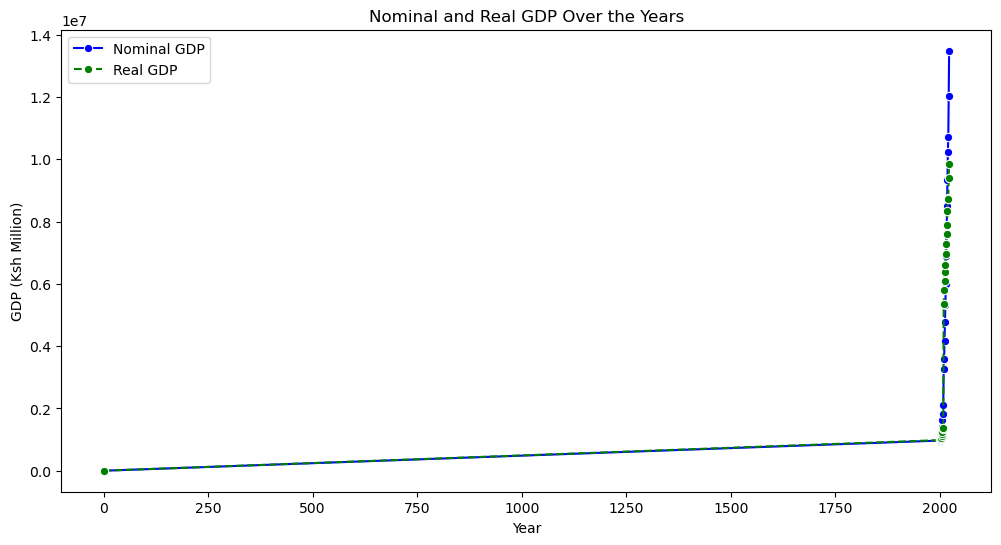

In [68]:
# Line plot for Nominal and Real GDP over the years with improved clarity
plt.figure(figsize=(12, 6))

# Plot Nominal GDP with blue solid line
sns.lineplot(x='Year', y='Nominal GDP prices (Ksh Million)', data=df2, marker='o', color='blue', label='Nominal GDP')

# Plot Real GDP with green dashed line
sns.lineplot(x='Year', y='Real GDP prices (Ksh Million)', data=df2, marker='o', color='green', linestyle='dashed', label='Real GDP')

plt.title('Nominal and Real GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (Ksh Million)')
plt.legend()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_364\3988866641.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




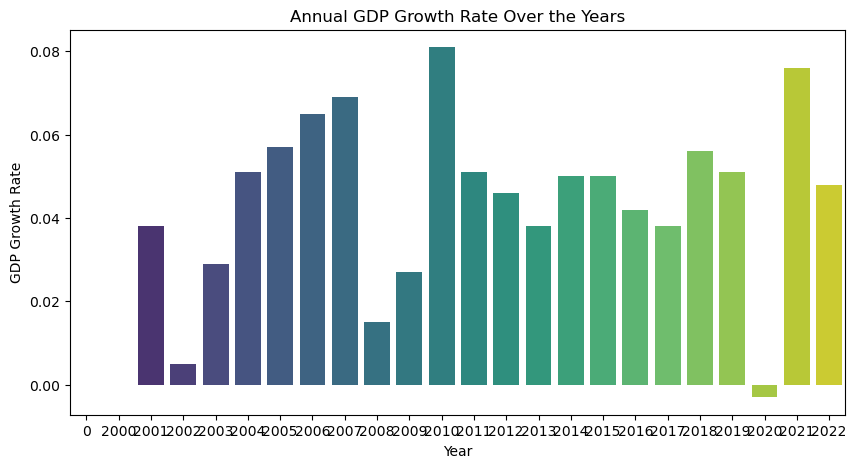

In [69]:
# Bar plot for GDP Growth Rate
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='GDP Growth Rate', data=df2, palette='viridis')
plt.title('Annual GDP Growth Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate')
plt.show()

In [70]:
import pandas as pd
df3 = pd.read_csv('Data/Central Bank Rates.csv')
df3.head()

YEAR MONTH  Repo            Reverse Repo  Interbank Rate  91-Day Tbill  \
0  2006   Jan  7.81                    -               7.78          8.23   
1   NaN   Feb  7.78                    -               7.73          8.02   
2   NaN   Mar   7.5                    -               7.52          7.60   
3   NaN   Apr  6.78                    -               6.97          7.02   
4   NaN   May  6.68                    -               8.11          7.01   

  182-days Tbill          364-days Tbill  Cash Reserve Requirement  \
0           8.84                    -                          6.0   
1           8.85                    -                          6.0   
2           8.52                    -                          6.0   
3           7.36                    -                          6.0   
4           7.48                    -                          6.0   

   Central Bank Rate  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [71]:
# Check for missing values
print(df3.isnull().sum())

YEAR                        198
MONTH                         2
Repo                          6
Reverse Repo                 19
Interbank Rate                2
91-Day Tbill                  2
182-days Tbill                2
364-days Tbill                2
Cash Reserve Requirement      2
Central Bank Rate             7
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_364\2160181539.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: 'value' must be an instance of str or bytes, not a float

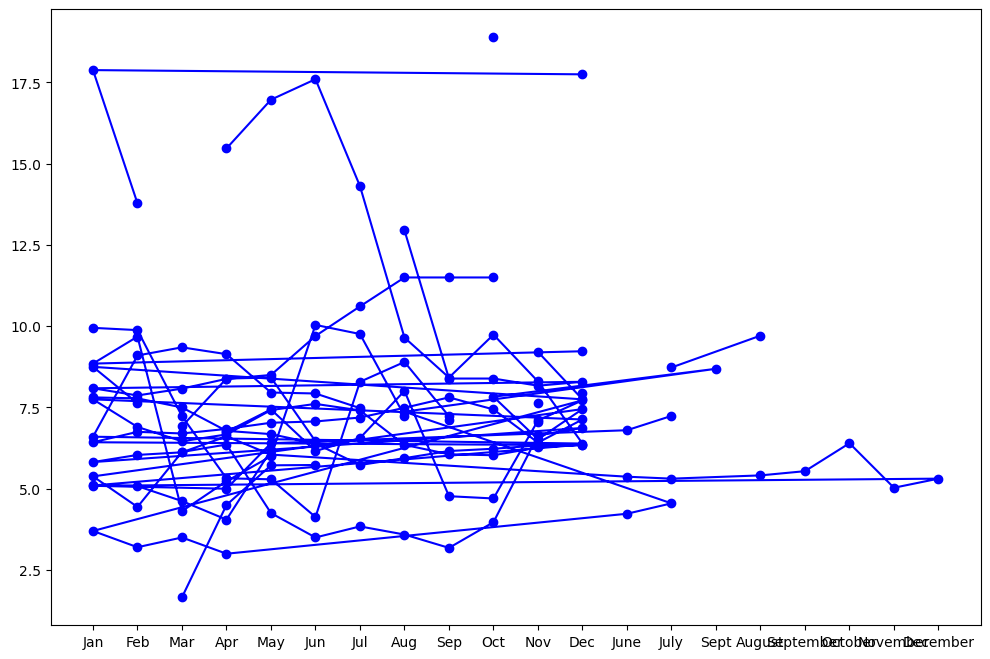

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df3 is your Central Bank Rates dataframe
# Drop rows with missing 'Repo' values
df3_cleaned = df3.dropna(subset=['Repo'])

# Convert 'Repo' column to numeric
df3_cleaned['Repo'] = pd.to_numeric(df3_cleaned['Repo'], errors='coerce')

plt.figure(figsize=(12, 8))
plt.plot(df3_cleaned['MONTH'], df3_cleaned['Repo'], label='Repo Rate', marker='o', color='blue')
plt.plot(df3_cleaned['MONTH'], df3_cleaned['Reverse Repo'], label='Reverse Repo Rate', marker='o', color='orange')
# Add other rates as needed
plt.title('Central Bank Rates Over Time')
plt.xlabel('Month')
plt.ylabel('Interest Rates')
plt.legend()
plt.grid(True)
plt.show()


TypeError: 'value' must be an instance of str or bytes, not a float

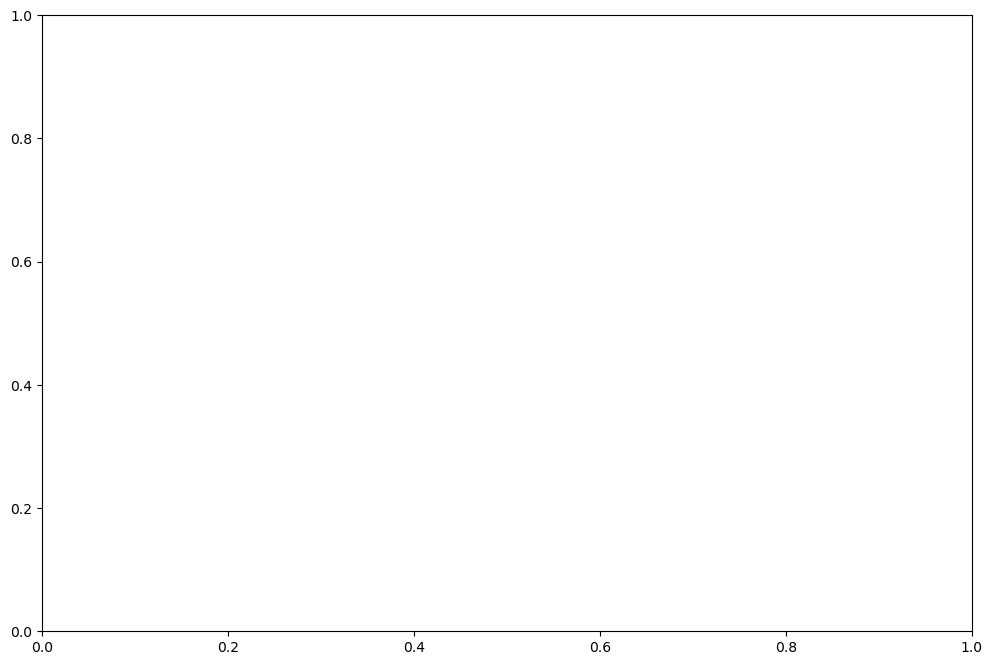

In [80]:
plt.figure(figsize=(12, 8))
plt.plot(df3['MONTH'], df3['Repo'], label='Repo Rate')
plt.plot(df3['MONTH'], df3['Reverse Repo'], label='Reverse Repo Rate')
# Add other rates as needed
plt.title('Central Bank Rates Over Time')
plt.xlabel('Month')
plt.ylabel('Interest Rates')
plt.legend()
plt.show()


In [72]:
import pandas as pd
df4 = pd.read_csv('Data/Dividends-Payout.csv')
df4.head()

DIVIDENDS  Announced Book Closure     Payment    Amount
0  Interim Dividend  1/26/2024    2/16/2024   4/26/2024  KES 1.00
1    Final Dividend  7/28/2023    9/15/2023  10/27/2023  KES 1.75
2    Final Dividend  7/28/2023    9/14/2023  10/27/2023  KES 1.75
3  Interim Dividend  1/27/2023    2/16/2023   4/28/2023  KES 3.75
4    Final Dividend  7/28/2022    9/15/2022  10/30/2022  KES 7.25

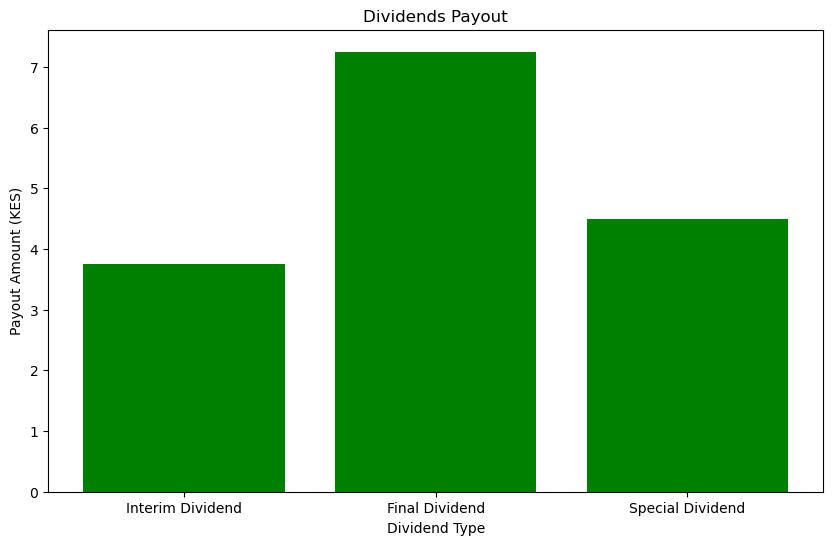

In [81]:
df4['Amount'] = df4['Amount'].apply(lambda x: float(x.split()[1]))
plt.figure(figsize=(10, 6))
plt.bar(df4['DIVIDENDS'], df4['Amount'], color='green')
plt.title('Dividends Payout')
plt.xlabel('Dividend Type')
plt.ylabel('Payout Amount (KES)')
plt.show()


Problematic Rows with NaN Amounts:
Empty DataFrame
Columns: [DIVIDENDS, Announced, Book Closure, Payment, Amount, Dividend_Type_Encoded, Announcement_Month, Announcement_Year, BookClosure_Month, BookClosure_Year, Payment_Month, Payment_Year]
Index: []


ValueError: Could not interpret value `Book Closure - Announced` for `y`. An entry with this name does not appear in `data`.

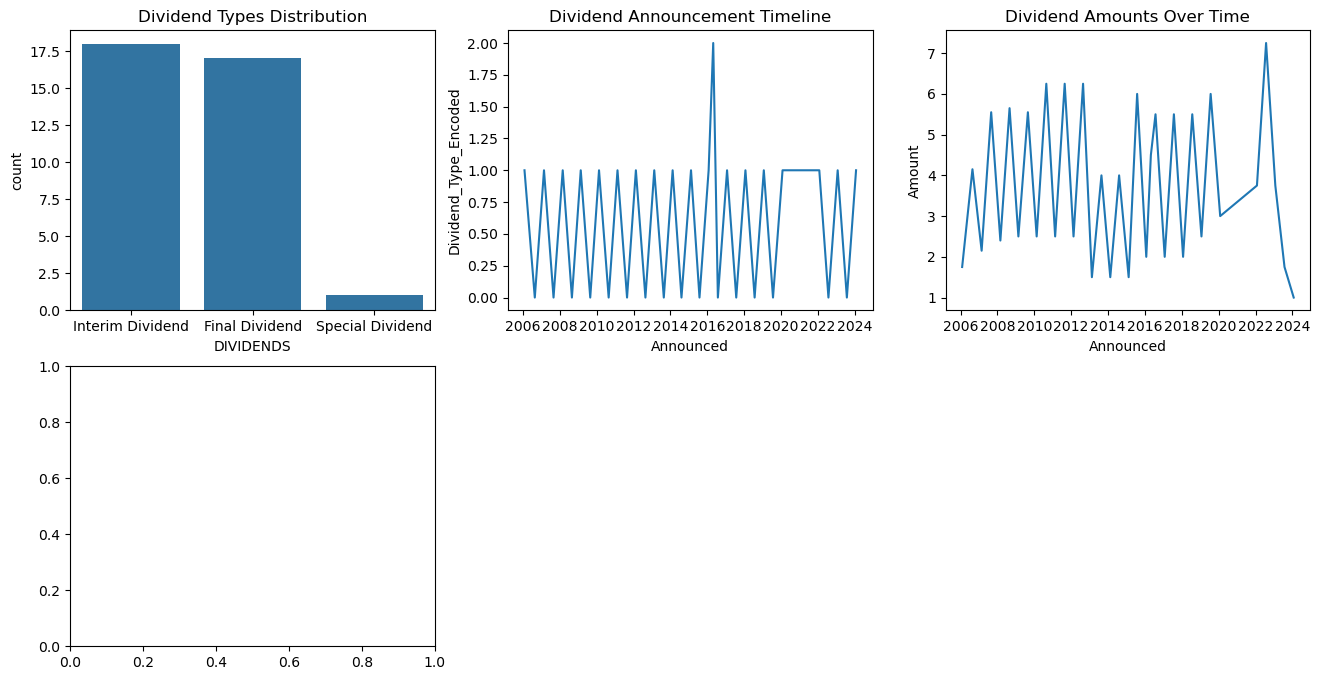

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df4 is your Dividends Payout dataframe

# Feature Engineering
# 1. Dividend Type Encoding
df4['Dividend_Type_Encoded'] = pd.Categorical(df4['DIVIDENDS']).codes

# 2. Time-related Features
df4['Announced'] = pd.to_datetime(df4['Announced'])
df4['Book Closure'] = pd.to_datetime(df4['Book Closure'])
df4['Payment'] = pd.to_datetime(df4['Payment'])

df4['Announcement_Month'] = df4['Announced'].dt.month
df4['Announcement_Year'] = df4['Announced'].dt.year

df4['BookClosure_Month'] = df4['Book Closure'].dt.month
df4['BookClosure_Year'] = df4['Book Closure'].dt.year

df4['Payment_Month'] = df4['Payment'].dt.month
df4['Payment_Year'] = df4['Payment'].dt.year

# 3. Dividend Amount
df4['Amount'] = df4['Amount'].apply(lambda x: float(x.split()[1]) if isinstance(x, str) else x)

# Print rows with problematic 'Amount' values
problematic_rows = df4[df4['Amount'].apply(lambda x: isinstance(x, float) and pd.isna(x))]
print("Problematic Rows with NaN Amounts:")
print(problematic_rows)

# Visualizations
plt.figure(figsize=(16, 8))

# 1. Dividend Types Distribution
plt.subplot(2, 3, 1)
sns.countplot(x='DIVIDENDS', data=df4)
plt.title('Dividend Types Distribution')

# 2. Dividend Announcement Timeline
plt.subplot(2, 3, 2)
sns.lineplot(x='Announced', y='Dividend_Type_Encoded', data=df4)
plt.title('Dividend Announcement Timeline')

# 3. Dividend Amounts Over Time
plt.subplot(2, 3, 3)
sns.lineplot(x='Announced', y='Amount', data=df4)
plt.title('Dividend Amounts Over Time')

# 4. Time Gap Analysis
plt.subplot(2, 3, 4)
sns.boxplot(x='DIVIDENDS', y='Book Closure - Announced', data=df4)
plt.title('Time Gap between Announcement and Book Closure')

# 5. Correlation Heatmap
plt.subplot(2, 3, 5)
correlation_matrix = df4.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_364\403578675.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Heatmap')

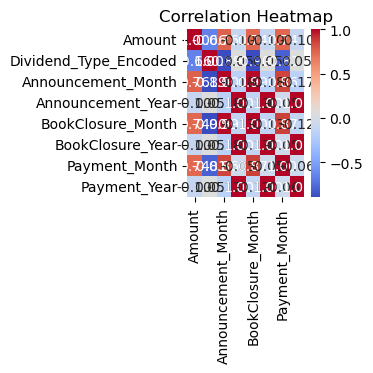

In [86]:
# 5. Correlation Heatmap
plt.subplot(2, 3, 5)
correlation_matrix = df4.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

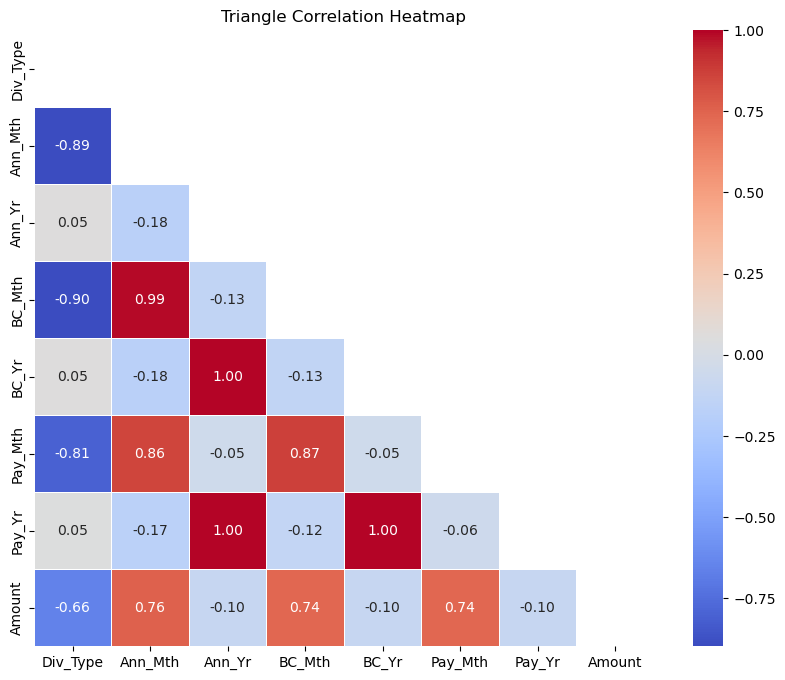

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df4 is your DataFrame
# Feature Engineering and preprocessing
df4['Dividend_Type_Encoded'] = pd.Categorical(df4['DIVIDENDS']).codes
df4['Announced'] = pd.to_datetime(df4['Announced'])
df4['Book Closure'] = pd.to_datetime(df4['Book Closure'])
df4['Payment'] = pd.to_datetime(df4['Payment'])
df4['Announcement_Month'] = df4['Announced'].dt.month
df4['Announcement_Year'] = df4['Announced'].dt.year
df4['BookClosure_Month'] = df4['Book Closure'].dt.month
df4['BookClosure_Year'] = df4['Book Closure'].dt.year
df4['Payment_Month'] = df4['Payment'].dt.month
df4['Payment_Year'] = df4['Payment'].dt.year
df4['Amount'] = df4['Amount'].apply(lambda x: float(x.split()[1]) if isinstance(x, str) else x)

# Select relevant columns for correlation analysis
correlation_cols = ['Dividend_Type_Encoded', 'Announcement_Month', 'Announcement_Year',
                    'BookClosure_Month', 'BookClosure_Year', 'Payment_Month', 'Payment_Year', 'Amount']

# Create a correlation matrix
correlation_matrix = df4[correlation_cols].corr()

# Create a mask to display only the lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Shortened attribute names
short_names = ['Div_Type', 'Ann_Mth', 'Ann_Yr', 'BC_Mth', 'BC_Yr', 'Pay_Mth', 'Pay_Yr', 'Amount']

# Plot the heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".2f",
            xticklabels=short_names, yticklabels=short_names, linewidths=.5)

plt.title('Triangle Correlation Heatmap')
plt.show()


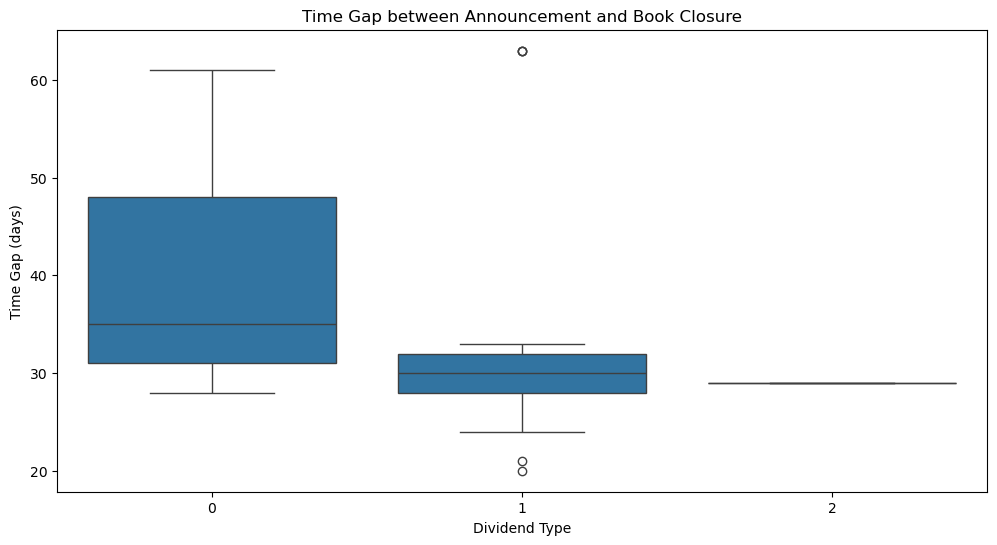

In [88]:
# Create the 'Book Closure - Announced' column
df4['Book Closure - Announced'] = (df4['Book Closure'] - df4['Announced']).dt.days

# Plot the Time Gap Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dividend_Type_Encoded', y='Book Closure - Announced', data=df4)
plt.title('Time Gap between Announcement and Book Closure')
plt.xlabel('Dividend Type')
plt.ylabel('Time Gap (days)')
plt.show()

This boxplot helps in understanding the variation in the time gap between the announcement and book closure for different types of dividends. It allows you to identify any potential patterns, outliers, or differences in the distribution of time gaps across the dividend types.

In [73]:
import pandas as pd
df5 = pd.read_csv('Data/Exchange-rates-CBK.csv')
df5.head()

Date   Currency      Mean       Buy      Sell
0    4/1/2024  US DOLLAR  157.3912  157.0000  157.7824
1    3/1/2024  US DOLLAR  157.3235  156.9529  157.6941
2    2/1/2024  US DOLLAR  156.9853  156.5000  157.4706
3  29/12/2023  US DOLLAR  156.4618  156.0118  156.9118
4  28/12/2023  US DOLLAR  156.0941  155.6588  156.5294

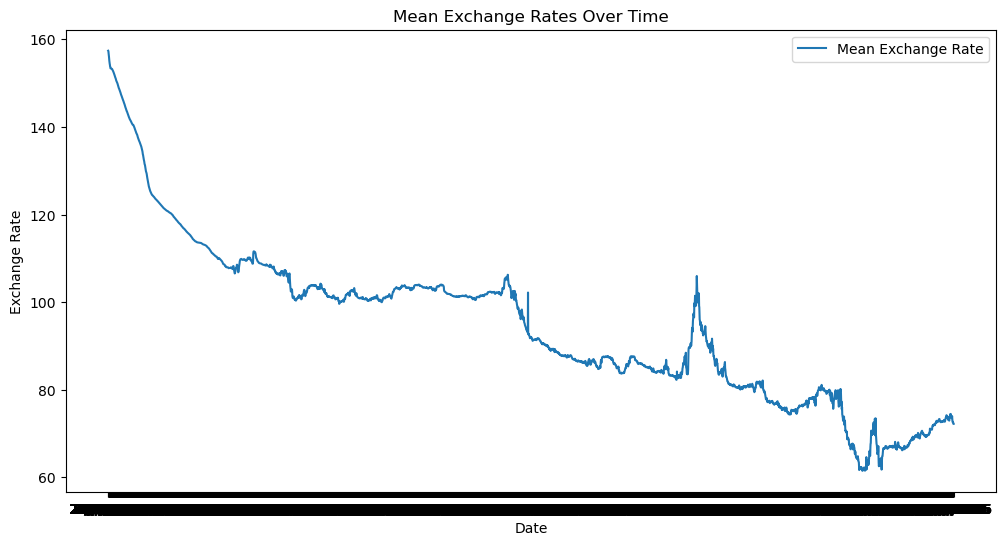

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(df5['Date'], df5['Mean'], label='Mean Exchange Rate')
plt.title('Mean Exchange Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_364\4139149794.py:8: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

C:\Users\user\AppData\Local\Temp\ipykernel_364\4139149794.py:43: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



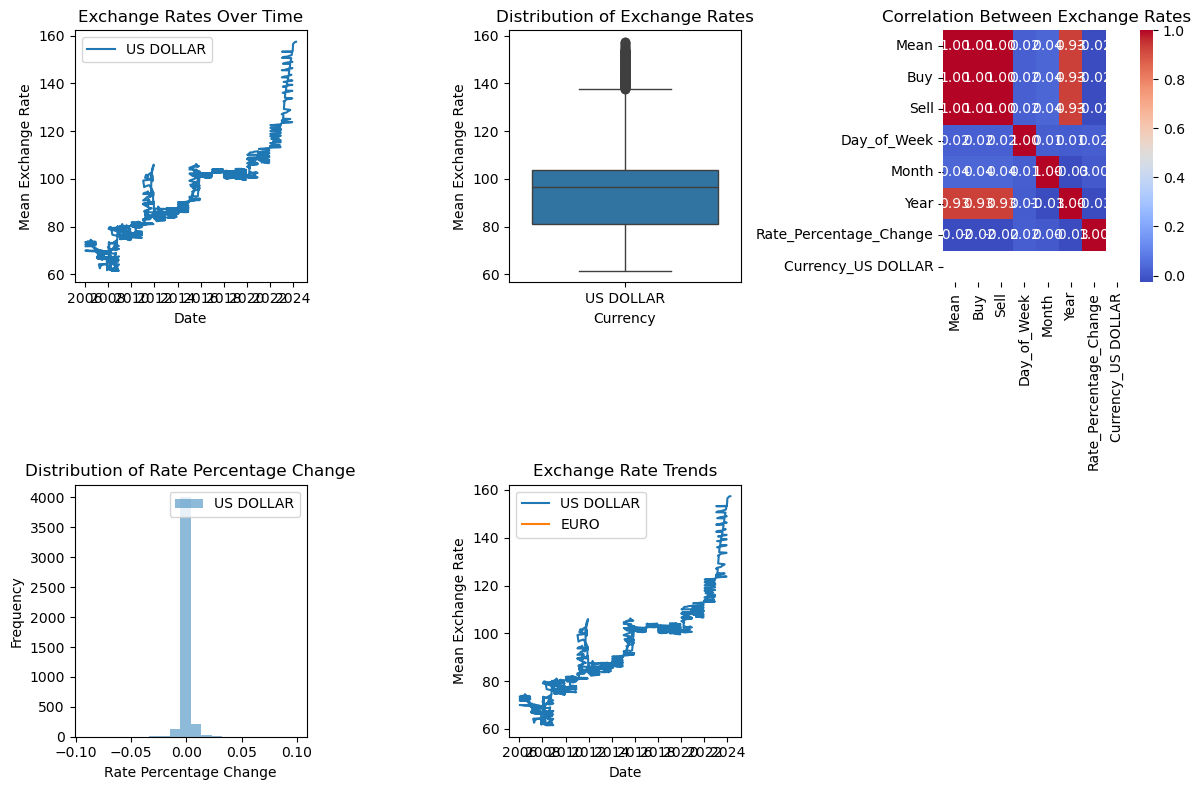

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df5 is your Exchange rates dataframe

# Feature Engineering
df5['Date'] = pd.to_datetime(df5['Date'])
df5['Day_of_Week'] = df5['Date'].dt.dayofweek
df5['Month'] = df5['Date'].dt.month
df5['Year'] = df5['Date'].dt.year
df5['Rate_Percentage_Change'] = df5.groupby('Currency')['Mean'].pct_change()

# One-Hot Encoding for Currency
df5_encoded = pd.get_dummies(df5, columns=['Currency'], prefix='Currency')

# Moving Averages
window_size = 7
df5['7_Day_MA'] = df5.groupby('Currency')['Mean'].rolling(window=window_size).mean().reset_index(0, drop=True)

# Visualizations
plt.figure(figsize=(12, 8))

# Line Plot
plt.subplot(2, 3, 1)
for currency in df5['Currency'].unique():
    currency_data = df5[df5['Currency'] == currency]
    plt.plot(currency_data['Date'], currency_data['Mean'], label=currency)
plt.title('Exchange Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Exchange Rate')
plt.legend()

# Boxplot
plt.subplot(2, 3, 2)
sns.boxplot(x='Currency', y='Mean', data=df5)
plt.title('Distribution of Exchange Rates')
plt.xlabel('Currency')
plt.ylabel('Mean Exchange Rate')

# Correlation Heatmap
plt.subplot(2, 3, 3)
correlation_matrix = df5_encoded.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title('Correlation Between Exchange Rates')

# Histogram
plt.subplot(2, 3, 4)
for currency in df5['Currency'].unique():
    currency_data = df5[df5['Currency'] == currency]
    plt.hist(currency_data['Rate_Percentage_Change'].dropna(), bins=20, label=currency, alpha=0.5)
plt.title('Distribution of Rate Percentage Change')
plt.xlabel('Rate Percentage Change')
plt.ylabel('Frequency')
plt.legend()

# Currency Trends
plt.subplot(2, 3, 5)
selected_currencies = ['US DOLLAR', 'EURO']
for currency in selected_currencies:
    currency_data = df5[df5['Currency'] == currency]
    plt.plot(currency_data['Date'], currency_data['Mean'], label=currency)
plt.title('Exchange Rate Trends')
plt.xlabel('Date')
plt.ylabel('Mean Exchange Rate')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df1 = pd.read_csv('Data/Inflation Rates.csv')
df1.head()

Year      Month  Annual Average Inflation  12-Month Inflation
0  2023   December                      7.67                6.63
1  2023   November                      7.87                6.80
2  2023    October                      8.10                6.92
3  2023  September                      8.32                6.78
4  2023     August                      8.52                6.73

In [74]:
import pandas as pd
df6 = pd.read_csv('Data/Yearly_unemploymnet_rates.csv')
df6.head()

Year Unemployment Rate (%) Annual Change
0  2022                 5.50%        -0.14%
1  2021                 5.64%         0.03%
2  2020                 5.62%         0.61%
3  2019                 5.01%         0.77%
4  2018                 4.25%         0.73%

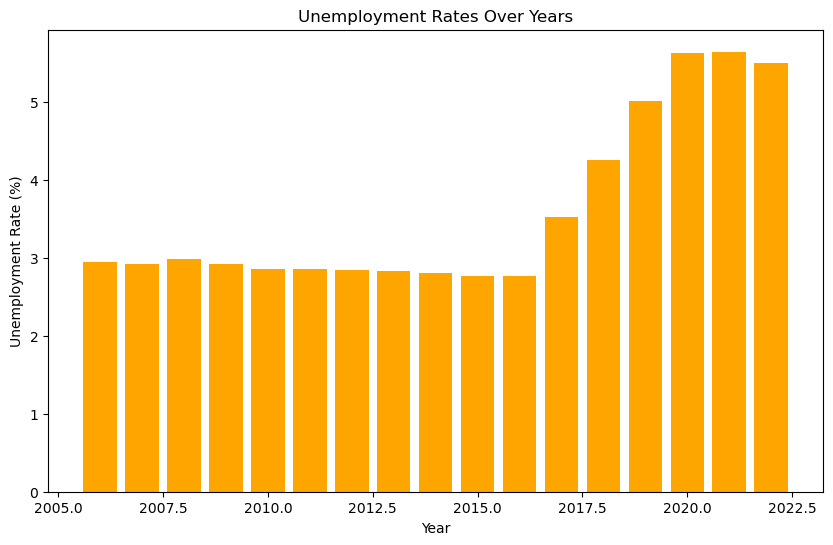

In [83]:
df6['Unemployment Rate (%)'] = df6['Unemployment Rate (%)'].apply(lambda x: float(x.strip('%')))
plt.figure(figsize=(10, 6))
plt.bar(df6['Year'], df6['Unemployment Rate (%)'], color='orange')
plt.title('Unemployment Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df6 is your Unemployment Rates dataframe

# Preprocessing
#df6['Year'] = pd.to_datetime(df6['Year'])
#df6['Unemployment Rate (%)'] = pd.to_numeric(df6['Unemployment Rate (%)'].str.rstrip('%').replace(',', ''), errors='coerce')

# Feature Engineering
df6['Month'] = df6['Year'].dt.month
df6['Quarter'] = df6['Year'].dt.to_period("Q")
df6['Prev_Year_Unemployment_Rate'] = df6.groupby('Month')['Unemployment Rate (%)'].shift(12)
df6['Unemployment_Rate_Change'] = df6['Unemployment Rate (%)'] - df6['Prev_Year_Unemployment_Rate']
df6['Unemployment_Rate_Increase'] = (df6['Unemployment_Rate_Change'] > 0).astype(int)

# Moving Averages
window_size = 3
df6['3_Year_MA'] = df6.groupby('Month')['Unemployment Rate (%)'].rolling(window=window_size).mean().reset_index(0, drop=True)


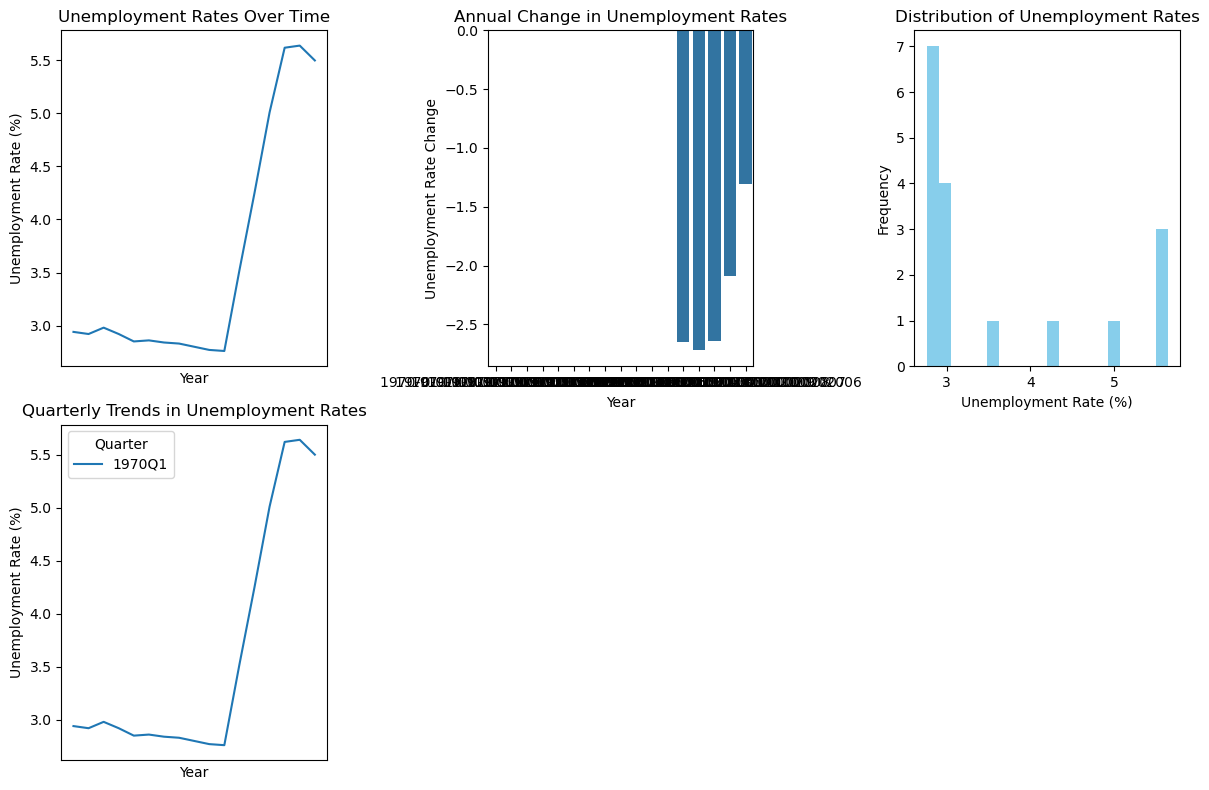

In [92]:
# Visualizations
plt.figure(figsize=(12, 8))

# Line Plot
plt.subplot(2, 3, 1)
plt.plot(df6['Year'], df6['Unemployment Rate (%)'])
plt.title('Unemployment Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

# Bar Plot
plt.subplot(2, 3, 2)
sns.barplot(x='Year', y='Unemployment_Rate_Change', data=df6)
plt.title('Annual Change in Unemployment Rates')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate Change')

# Histogram
plt.subplot(2, 3, 3)
plt.hist(df6['Unemployment Rate (%)'].dropna(), bins=20, color='skyblue')
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')

# Quarterly Trends
plt.subplot(2, 3, 4)
sns.lineplot(x='Year', y='Unemployment Rate (%)', hue='Quarter', data=df6)
plt.title('Quarterly Trends in Unemployment Rates')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Unemployment Rate (%)')

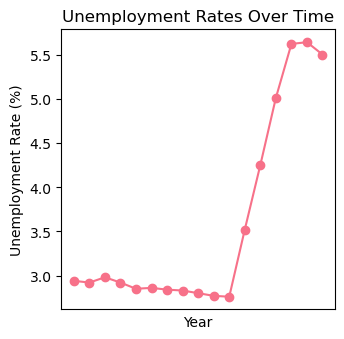

In [93]:
# Set a colorful palette
color_palette = sns.color_palette("husl")

# Visualizations
plt.figure(figsize=(12, 8))

# Line Plot
plt.subplot(2, 3, 1)
plt.plot(df6['Year'], df6['Unemployment Rate (%)'], marker='o', linestyle='-', color=color_palette[0])
plt.title('Unemployment Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

C:\Users\user\AppData\Local\Temp\ipykernel_364\3980145834.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\user\AppData\Local\Temp\ipykernel_364\3980145834.py:3: UserWarning:


The palette list has fewer values (6) than needed (17) and will cycle, which may produce an uninterpretable plot.



Text(0, 0.5, 'Unemployment Rate Change')

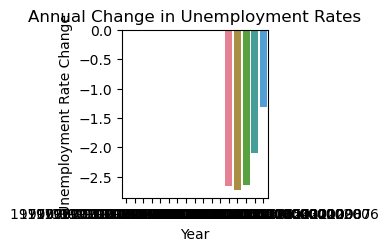

In [94]:
# Bar Plot
plt.subplot(2, 3, 2)
sns.barplot(x='Year', y='Unemployment_Rate_Change', data=df6, palette=color_palette)
plt.title('Annual Change in Unemployment Rates')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate Change')

Text(0, 0.5, 'Frequency')

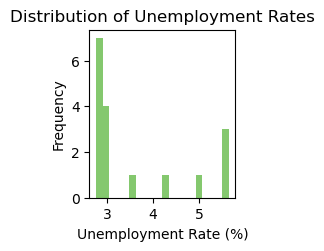

In [95]:
# Histogram
plt.subplot(2, 3, 3)
plt.hist(df6['Unemployment Rate (%)'].dropna(), bins=20, color=color_palette[2], alpha=0.7)
plt.title('Distribution of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')

In [96]:
# Quarterly Trends
plt.subplot(2, 3, 4)
sns.lineplot(x='Year', y='Unemployment Rate (%)', hue='Quarter', data=df6, palette=color_palette)
plt.title('Quarterly Trends in Unemployment Rates')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')

C:\Users\user\AppData\Local\Temp\ipykernel_364\4169395982.py:3: UserWarning:

The palette list has more values (6) than needed (1), which may not be intended.



Text(0, 0.5, 'Unemployment Rate (%)')

In [76]:
import pandas as pd
df8 = pd.read_csv('Data/final_merge.csv')
df8.head()

Unnamed: 0       Date    Open    High    Low  Close  Average  Volume  \
0           0  1/31/2024  104.00  111.00  104.0  110.0   106.00   42000   
1           1  1/30/2024  105.00  105.00  101.0  104.0   104.00   15600   
2           2  1/29/2024  105.00  105.00   99.0  103.5   100.00  596100   
3           3  1/26/2024  116.25  116.25  100.0  100.0   104.50   60500   
4           4  1/25/2024  119.75  120.00  118.0  118.0   118.25    5700   

   Month  Year  Day  Annual Average Inflation  12-Month Inflation   Mean  \
0      1  2024   31                       NaN                 6.9  161.0   
1      1  2024   30                       NaN                 6.9  161.0   
2      1  2024   29                       NaN                 6.9  162.0   
3      1  2024   26                       NaN                 6.9  162.0   
4      1  2024   25                       NaN                 6.9  163.0   

   Amount  Dividends per share  Earnings Per Share  
0    1.00                  0.0                 NaN  
1    1.00                  0.0                 NaN  
2    1.00                  0.0                 NaN  
3    1.00                  0.0                 NaN  
4    1.75                  0.0                 NaN

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
df8['Date'] = pd.to_datetime(df8['Date'])
df8['Day'] = df8['Date'].dt.day
df8['Month'] = df8['Date'].dt.month
df8['Year'] = df8['Date'].dt.year

# Visualizations
plt.figure(figsize=(16, 12))

# Stock Price Trends
plt.subplot(3, 3, 1)
sns.lineplot(x='Date', y='Close', data=df8)
plt.title('Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Candlestick Chart
# (You may need to use a library specifically designed for candlestick charts)

# Financial Ratios Over Time
plt.subplot(3, 3, 3)
sns.lineplot(x='Date', y='Dividends per share', data=df8, label='Dividends per share')
sns.lineplot(x='Date', y='Earnings Per Share', data=df8, label='Earnings Per Share')
plt.title('Financial Ratios Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Correlation Heatmap
plt.subplot(3, 3, 5)
correlation_matrix = df8[['Close', 'Dividends per share', 'Earnings Per Share', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Volume Analysis
plt.subplot(3, 3, 7)
sns.lineplot(x='Date', y='Volume', data=df8)
plt.title('Volume Analysis')
plt.xlabel('Date')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()


In [99]:
df.head()

Date    Open    High    Low  Close  Average  Volume  Day  Month  Year  \
0 2024-01-31  104.00  111.00  104.0  110.0   106.00   42000   31      1  2024   
1 2024-01-30  105.00  105.00  101.0  104.0   104.00   15600   30      1  2024   
2 2024-01-29  105.00  105.00   99.0  103.5   100.00  596100   29      1  2024   
3 2024-01-26  116.25  116.25  100.0  100.0   104.50   60500   26      1  2024   
4 2024-01-25  119.75  120.00  118.0  118.0   118.25    5700   25      1  2024   

   Price_Diff  Price_Percent_Change  MA_7  MA_30  Volatility  Signal  
0         NaN                   NaN   NaN    NaN         NaN       0  
1        -6.0             -5.454545   NaN    NaN         NaN       0  
2        -0.5             -0.480769   NaN    NaN         NaN       0  
3        -3.5             -3.381643   NaN    NaN         NaN       0  
4        18.0             18.000000   NaN    NaN         NaN       0

In [100]:
df1.head()


Year      Month  Annual Average Inflation  12-Month Inflation
0  2023   December                      7.67                6.63
1  2023   November                      7.87                6.80
2  2023    October                      8.10                6.92
3  2023  September                      8.32                6.78
4  2023     August                      8.52                6.73

In [101]:
df2.head()


Year  Nominal GDP prices (Ksh Million)  Annual GDP growth (%)  \
0  2022                          13483003                    4.8   
1  2021                          12027662                    7.6   
2  2020                          10715070                   -0.3   
3  2019                          10237727                    5.1   
4  2018                           9340307                    5.6   

   Real GDP prices (Ksh Million)  GDP Growth Rate  
0                        9851329            0.048  
1                        9395942            0.076  
2                        8733060           -0.003  
3                        8756946            0.051  
4                        8330891            0.056

In [102]:
df3.head()


YEAR MONTH  Repo            Reverse Repo  Interbank Rate  91-Day Tbill  \
0  2006   Jan  7.81                    -               7.78          8.23   
1   NaN   Feb  7.78                    -               7.73          8.02   
2   NaN   Mar   7.5                    -               7.52          7.60   
3   NaN   Apr  6.78                    -               6.97          7.02   
4   NaN   May  6.68                    -               8.11          7.01   

  182-days Tbill          364-days Tbill  Cash Reserve Requirement  \
0           8.84                    -                          6.0   
1           8.85                    -                          6.0   
2           8.52                    -                          6.0   
3           7.36                    -                          6.0   
4           7.48                    -                          6.0   

   Central Bank Rate  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN

In [103]:
df4.head()


DIVIDENDS  Announced Book Closure    Payment  Amount  \
0  Interim Dividend 2024-01-26   2024-02-16 2024-04-26    1.00   
1    Final Dividend 2023-07-28   2023-09-15 2023-10-27    1.75   
2    Final Dividend 2023-07-28   2023-09-14 2023-10-27    1.75   
3  Interim Dividend 2023-01-27   2023-02-16 2023-04-28    3.75   
4    Final Dividend 2022-07-28   2022-09-15 2022-10-30    7.25   

   Dividend_Type_Encoded  Announcement_Month  Announcement_Year  \
0                      1                   1               2024   
1                      0                   7               2023   
2                      0                   7               2023   
3                      1                   1               2023   
4                      0                   7               2022   

   BookClosure_Month  BookClosure_Year  Payment_Month  Payment_Year  \
0                  2              2024              4          2024   
1                  9              2023             10          2023   
2                  9              2023             10          2023   
3                  2              2023              4          2023   
4                  9              2022             10          2022   

   Book Closure - Announced  
0                        21  
1                        49  
2                        48  
3                        20  
4                        49

In [104]:
df5.head()


Date   Currency      Mean       Buy      Sell  Day_of_Week  Month  \
0 2024-04-01  US DOLLAR  157.3912  157.0000  157.7824            0      4   
1 2024-03-01  US DOLLAR  157.3235  156.9529  157.6941            4      3   
2 2024-02-01  US DOLLAR  156.9853  156.5000  157.4706            3      2   
3 2023-12-29  US DOLLAR  156.4618  156.0118  156.9118            4     12   
4 2023-12-28  US DOLLAR  156.0941  155.6588  156.5294            3     12   

   Year  Rate_Percentage_Change  7_Day_MA  
0  2024                     NaN       NaN  
1  2024               -0.000430       NaN  
2  2024               -0.002150       NaN  
3  2023               -0.003335       NaN  
4  2023               -0.002350       NaN

In [105]:
df6.head()


Year  Unemployment Rate (%) Annual Change  Month  \
0 1970-01-01 00:00:00.000002022                   5.50        -0.14%      1   
1 1970-01-01 00:00:00.000002021                   5.64         0.03%      1   
2 1970-01-01 00:00:00.000002020                   5.62         0.61%      1   
3 1970-01-01 00:00:00.000002019                   5.01         0.77%      1   
4 1970-01-01 00:00:00.000002018                   4.25         0.73%      1   

  Quarter  Prev_Year_Unemployment_Rate  Unemployment_Rate_Change  \
0  1970Q1                          NaN                       NaN   
1  1970Q1                          NaN                       NaN   
2  1970Q1                          NaN                       NaN   
3  1970Q1                          NaN                       NaN   
4  1970Q1                          NaN                       NaN   

   Unemployment_Rate_Increase  3_Year_MA  
0                           0        NaN  
1                           0        NaN  
2                           0   5.586667  
3                           0   5.423333  
4                           0   4.960000

In [106]:
df7.head()


Year      Month  Annual Average Inflation  12-Month Inflation
0  2023   December                      7.67                6.63
1  2023   November                      7.87                6.80
2  2023    October                      8.10                6.92
3  2023  September                      8.32                6.78
4  2023     August                      8.52                6.73

In [107]:
df8.head()


Unnamed: 0       Date    Open    High    Low  Close  Average  Volume  \
0           0 2024-01-31  104.00  111.00  104.0  110.0   106.00   42000   
1           1 2024-01-30  105.00  105.00  101.0  104.0   104.00   15600   
2           2 2024-01-29  105.00  105.00   99.0  103.5   100.00  596100   
3           3 2024-01-26  116.25  116.25  100.0  100.0   104.50   60500   
4           4 2024-01-25  119.75  120.00  118.0  118.0   118.25    5700   

   Month  Year  Day  Annual Average Inflation  12-Month Inflation   Mean  \
0      1  2024   31                       NaN                 6.9  161.0   
1      1  2024   30                       NaN                 6.9  161.0   
2      1  2024   29                       NaN                 6.9  162.0   
3      1  2024   26                       NaN                 6.9  162.0   
4      1  2024   25                       NaN                 6.9  163.0   

   Amount  Dividends per share  Earnings Per Share  
0    1.00                  0.0                 NaN  
1    1.00                  0.0                 NaN  
2    1.00                  0.0                 NaN  
3    1.00                  0.0                 NaN  
4    1.75                  0.0                 NaN

In [4]:
pip install mplfinance


  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 830.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


c:\Users\user\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


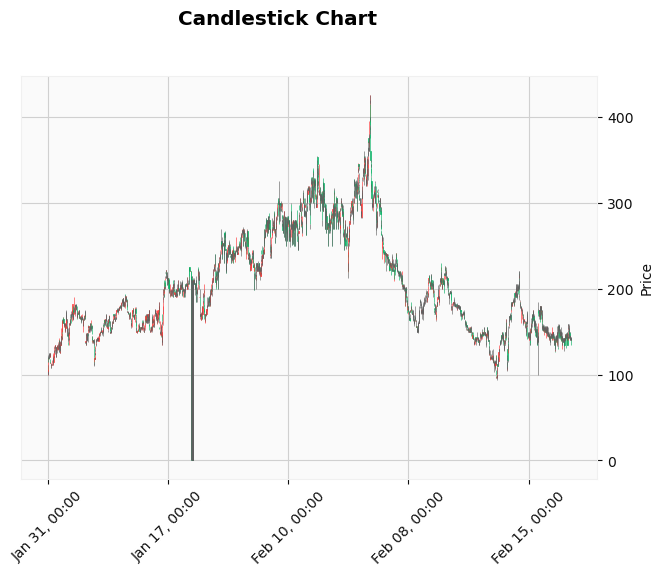

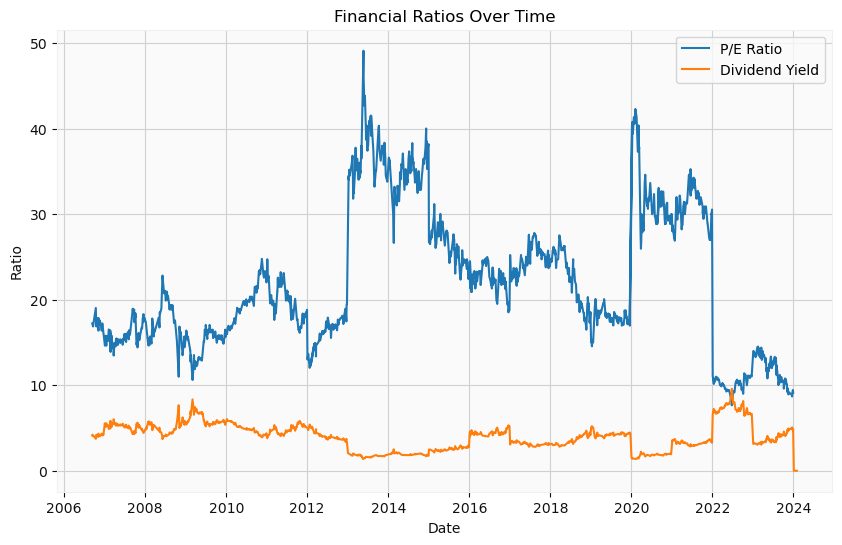

C:\Users\user\AppData\Local\Temp\ipykernel_8724\4116539154.py:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df8.corr()


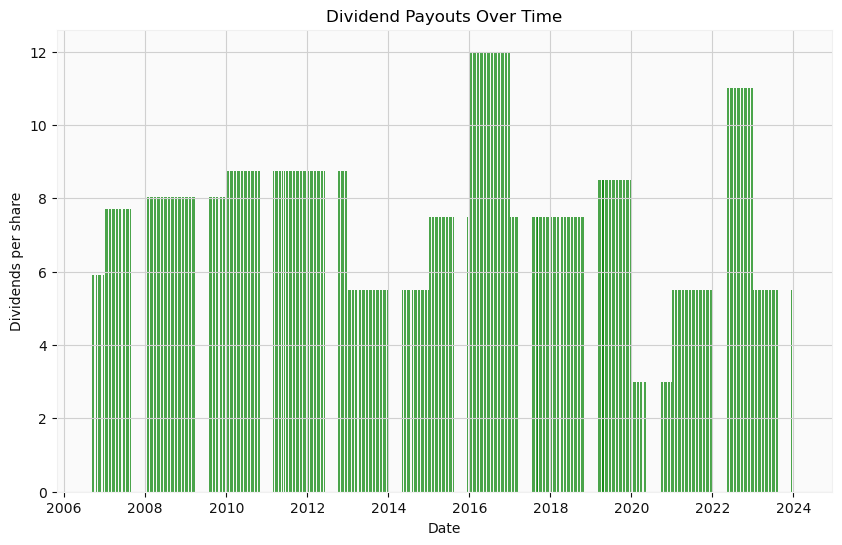

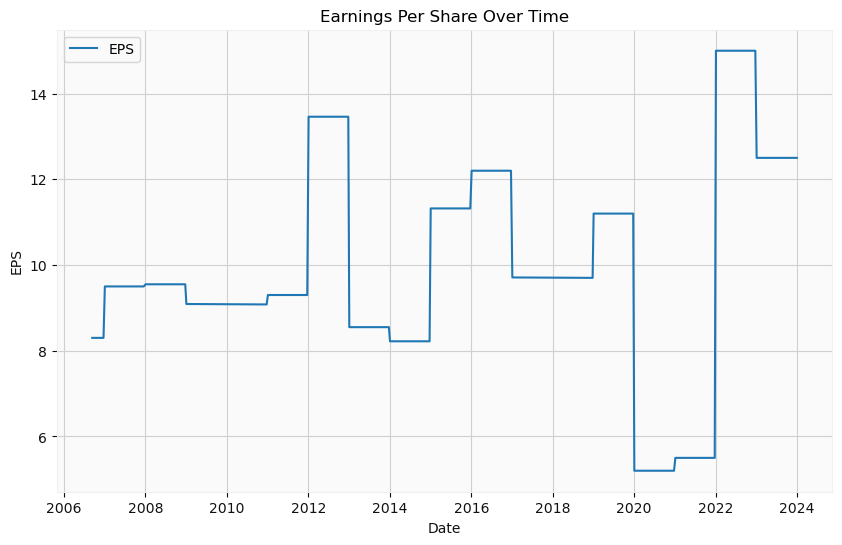

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df8 = pd.read_csv('Data/final_merge.csv')

# Feature Engineering Techniques

# a. Time Features
df8['Date'] = pd.to_datetime(df8['Date'])
df8['Day'] = df8['Date'].dt.day
df8['Month'] = df8['Date'].dt.month
df8['Year'] = df8['Date'].dt.year

# b. Financial Ratios
df8['PE_Ratio'] = df8['Close'] / df8['Earnings Per Share']
df8['Dividend_Yield'] = (df8['Dividends per share'] / df8['Close']) * 100

# c. Moving Averages
df8['50_Day_MA'] = df8['Close'].rolling(window=50).mean()
df8['200_Day_MA'] = df8['Close'].rolling(window=200).mean()

# d. Percentage Changes
df8['Daily_Percentage_Change'] = df8['Close'].pct_change() * 100

# Visualizations

# a. Stock Price Trends
plt.figure(figsize=(10, 6))
plt.plot(df8['Date'], df8['Close'], label='Close Price')
plt.title('Stock Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# b. Candlestick Chart
# Requires additional libraries like mplfinance
# Uncomment the following lines if mplfinance is installed
import mplfinance as mpf
mpf.plot(df8.set_index('Date'), type='candle', style='yahoo', title='Candlestick Chart')

# c. Financial Ratios Over Time
plt.figure(figsize=(10, 6))
plt.plot(df8['Date'], df8['PE_Ratio'], label='P/E Ratio')
plt.plot(df8['Date'], df8['Dividend_Yield'], label='Dividend Yield')
plt.title('Financial Ratios Over Time')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()

# d. Sentiment Analysis (Assuming sentiment scores are available in the DataFrame)

# e. Correlation Heatmap (Plot Half Triangle)
plt.figure(figsize=(10, 8))
correlation_matrix = df8.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Heatmap (Half Triangle)')
plt.show()

# f. Volume Analysis
plt.figure(figsize=(10, 6))
plt.bar(df8['Date'], df8['Volume'], color='blue', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# g. Moving Averages
plt.figure(figsize=(10, 6))
plt.plot(df8['Date'], df8['Close'], label='Close Price')
plt.plot(df8['Date'], df8['50_Day_MA'], label='50-Day MA')
plt.plot(df8['Date'], df8['200_Day_MA'], label='200-Day MA')
plt.title('Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# h. Dividend Payouts
plt.figure(figsize=(10, 6))
plt.bar(df8['Date'], df8['Dividends per share'], color='green', alpha=0.7)
plt.title('Dividend Payouts Over Time')
plt.xlabel('Date')
plt.ylabel('Dividends per share')
plt.show()

# i. Earnings Per Share
plt.figure(figsize=(10, 6))
plt.plot(df8['Date'], df8['Earnings Per Share'], label='EPS')
plt.title('Earnings Per Share Over Time')
plt.xlabel('Date')
plt.ylabel('EPS')
plt.legend()
plt.show()


In [8]:
df8.head()

Unnamed: 0       Date    Open    High    Low  Close  Average  Volume  \
0           0 2024-01-31  104.00  111.00  104.0  110.0   106.00   42000   
1           1 2024-01-30  105.00  105.00  101.0  104.0   104.00   15600   
2           2 2024-01-29  105.00  105.00   99.0  103.5   100.00  596100   
3           3 2024-01-26  116.25  116.25  100.0  100.0   104.50   60500   
4           4 2024-01-25  119.75  120.00  118.0  118.0   118.25    5700   

   Month  Year  ...  12-Month Inflation   Mean  Amount  Dividends per share  \
0      1  2024  ...                 6.9  161.0    1.00                  0.0   
1      1  2024  ...                 6.9  161.0    1.00                  0.0   
2      1  2024  ...                 6.9  162.0    1.00                  0.0   
3      1  2024  ...                 6.9  162.0    1.00                  0.0   
4      1  2024  ...                 6.9  163.0    1.75                  0.0   

   Earnings Per Share  PE_Ratio  Dividend_Yield  50_Day_MA  200_Day_MA  \
0                 NaN       NaN             0.0        NaN         NaN   
1                 NaN       NaN             0.0        NaN         NaN   
2                 NaN       NaN             0.0        NaN         NaN   
3                 NaN       NaN             0.0        NaN         NaN   
4                 NaN       NaN             0.0        NaN         NaN   

   Daily_Percentage_Change  
0                      NaN  
1                -5.454545  
2                -0.480769  
3                -3.381643  
4                18.000000  

[5 rows x 22 columns]

Feature Engineering Techniques:

a. Time Features:

Converts the 'Date' column to a datetime format.
Extracts day, month, and year and adds them as separate columns ('Day', 'Month', 'Year').
b. Financial Ratios:

Calculates the Price to Earnings ratio (P/E) and Dividend Yield, adding them as new columns ('PE_Ratio', 'Dividend_Yield').
c. Moving Averages:

Computes the 50-day and 200-day moving averages for the 'Close' prices and adds them as new columns ('50_Day_MA', '200_Day_MA').
d. Percentage Changes:

Calculates the daily percentage change in 'Close' prices and adds it as a new column ('Daily_Percentage_Change').


Visualizations:

a. Stock Price Trends:

Plots the historical trend of 'Close' prices over time.
b. Candlestick Chart:

(Commented out) A candlestick chart can be plotted if the 'mplfinance' library is installed.
c. Financial Ratios Over Time:

Plots the trends of the calculated financial ratios ('PE_Ratio', 'Dividend_Yield') over time.
d. Sentiment Analysis:

(Assumed but not implemented) Sentiment scores are not provided in the code.
e. Correlation Heatmap:

Plots a heatmap of the correlation matrix for all numerical columns in the DataFrame.
f. Volume Analysis:

Plots a bar chart showing the trading volume over time.
g. Moving Averages:

Plots the 'Close' prices along with the 50-day and 200-day moving averages.
h. Dividend Payouts:

Plots a bar chart showing the dividend payouts over time.
i. Earnings Per Share:

Plots the trend of Earnings Per Share (EPS) over time.

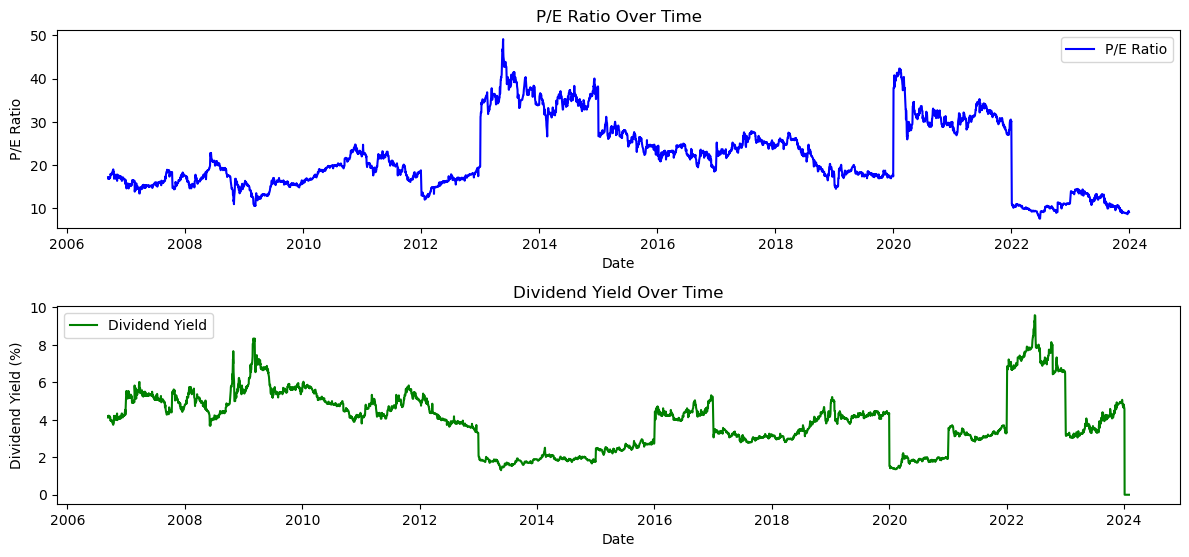

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df8 = pd.read_csv('Data/final_merge.csv')

# Feature Engineering
df8['Date'] = pd.to_datetime(df8['Date'])
df8['PE_Ratio'] = df8['Close'] / df8['Earnings Per Share']
df8['Dividend_Yield'] = (df8['Dividends per share'] / df8['Close']) * 100


# Plotting
plt.figure(figsize=(12, 8))

# P/E Ratio Plot
plt.subplot(3, 1, 1)
plt.plot(df8['Date'], df8['PE_Ratio'], label='P/E Ratio', color='blue')
plt.title('P/E Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('P/E Ratio')
plt.legend()

# Dividend Yield Plot
plt.subplot(3, 1, 2)
plt.plot(df8['Date'], df8['Dividend_Yield'], label='Dividend Yield', color='green')
plt.title('Dividend Yield Over Time')
plt.xlabel('Date')
plt.ylabel('Dividend Yield (%)')
plt.legend()


plt.tight_layout()
plt.show()


Feature Engineering:

Converts the 'Date' column to a datetime format for better handling of date-related operations.
Calculates the Price to Earnings (P/E) ratio by dividing the 'Close' prices by the 'Earnings Per Share' and adds it as a new column 'PE_Ratio'.
Computes the Dividend Yield by dividing the 'Dividends per share' by the 'Close' prices and multiplying by 100, adding it as a new column 'Dividend_Yield'.

**To check if a stock is undervalued or overvalued, consider these common financial ratios:**

### Price to Earnings (P/E) Ratio:

The P/E ratio compares the stock's market price to its earnings per share (EPS).

**Formula:**
\[ P/E = \frac{\text{Market Price per Share}}{\text{Earnings Per Share (EPS)}} \]

- Plot the P/E ratio over time and compare with historical values or industry averages.

### Dividend Yield:

Dividend yield is the annual dividend income per share divided by the stock's market price.

**Formula:**
\[ \text{Dividend Yield} = \frac{\text{Dividends per Share}}{\text{Market Price per Share}} \times 100 \]

- A higher dividend yield might suggest undervaluation, but consider other factors as well.


These analyses and visualizations can help in understanding the volatility patterns, identifying periods of increased risk, and making informed decisions related to risk assessment.

In [9]:
df8['Daily_Returns'] = df8['Close'].pct_change() * 100


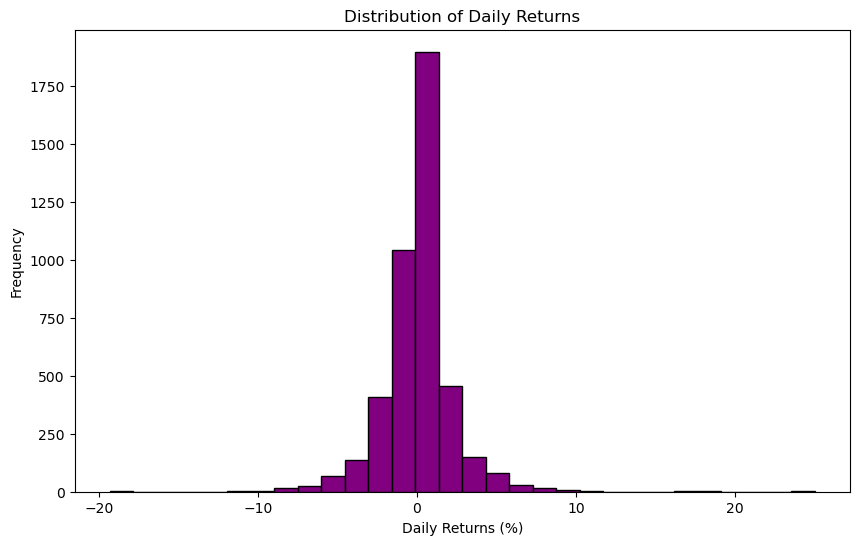

In [12]:
# Visualize the distribution of daily returns to understand the volatility pattern.
plt.figure(figsize=(10, 6))
plt.hist(df8['Daily_Returns'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Returns (%)')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Compute metrics: standard deviation and annualized volatility.
daily_volatility = df8['Daily_Returns'].std()
annualized_volatility = daily_volatility * np.sqrt(252)  # Assuming 252 trading days in a year


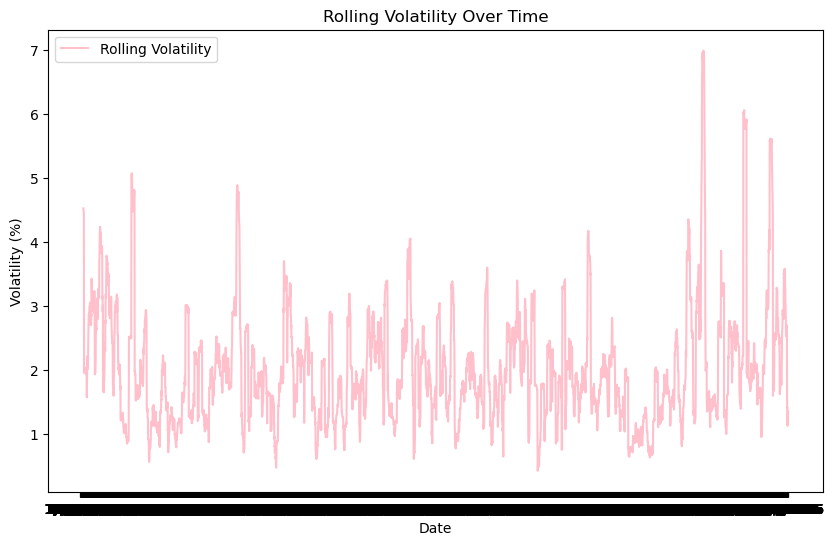

In [16]:
# Visualize the rolling volatility over a specified window (e.g., 20 days) to capture short-term trends

plt.figure(figsize=(10, 6))
df8['Rolling_Volatility'] = df8['Daily_Returns'].rolling(window=20).std()
plt.plot(df8['Date'], df8['Rolling_Volatility'], label='Rolling Volatility', color='pink')
plt.title('Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


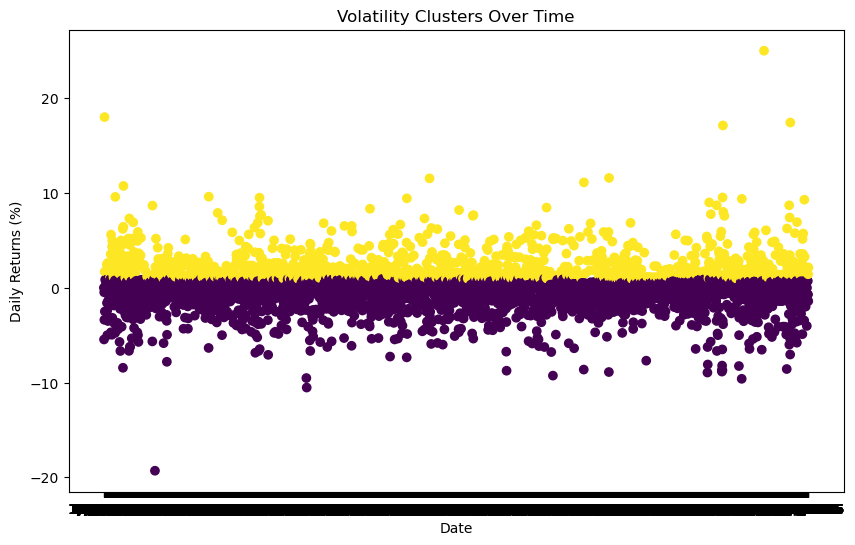

In [18]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming 'Daily_Returns' is standardized
df8['Daily_Returns'].fillna(0, inplace=True)  
# Replace NaN with 0

kmeans = KMeans(n_clusters=2).fit(df8[['Daily_Returns']])
df8['Volatility_Cluster'] = kmeans.labels_

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df8['Date'], df8['Daily_Returns'], c=df8['Volatility_Cluster'], cmap='viridis')
plt.title('Volatility Clusters Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.show()


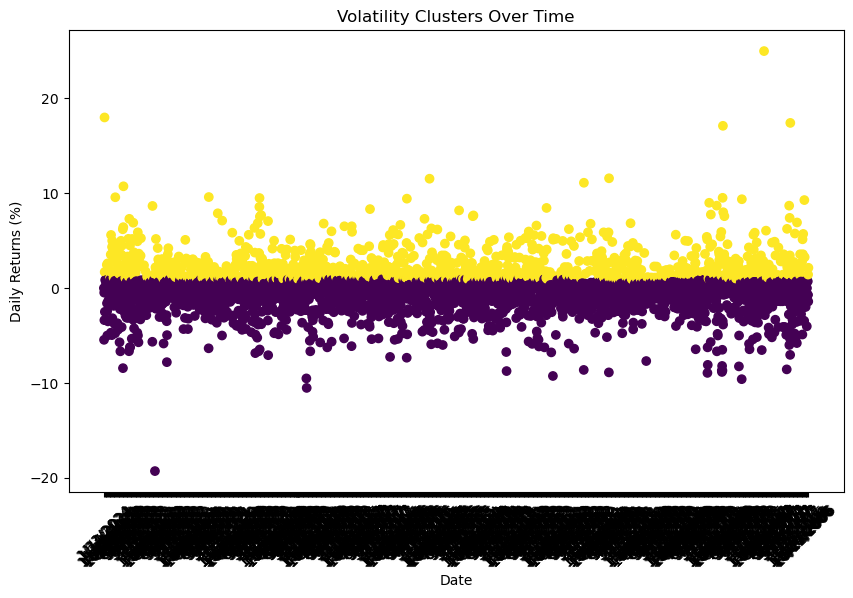

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df8['Date'], df8['Daily_Returns'], c=df8['Volatility_Cluster'], cmap='viridis')

# Adjust x-axis labels
step = 5  # Set the desired step size
plt.xticks(df8['Date'][::step], rotation=45)
# OR
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.title('Volatility Clusters Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns (%)')
plt.show()


In [20]:
df8.head()

Unnamed: 0       Date    Open    High    Low  Close  Average  Volume  \
0           0  1/31/2024  104.00  111.00  104.0  110.0   106.00   42000   
1           1  1/30/2024  105.00  105.00  101.0  104.0   104.00   15600   
2           2  1/29/2024  105.00  105.00   99.0  103.5   100.00  596100   
3           3  1/26/2024  116.25  116.25  100.0  100.0   104.50   60500   
4           4  1/25/2024  119.75  120.00  118.0  118.0   118.25    5700   

   Month  Year  Day  Annual Average Inflation  12-Month Inflation   Mean  \
0      1  2024   31                       NaN                 6.9  161.0   
1      1  2024   30                       NaN                 6.9  161.0   
2      1  2024   29                       NaN                 6.9  162.0   
3      1  2024   26                       NaN                 6.9  162.0   
4      1  2024   25                       NaN                 6.9  163.0   

   Amount  Dividends per share  Earnings Per Share  Daily_Returns  \
0    1.00                  0.0                 NaN       0.000000   
1    1.00                  0.0                 NaN      -5.454545   
2    1.00                  0.0                 NaN      -0.480769   
3    1.00                  0.0                 NaN      -3.381643   
4    1.75                  0.0                 NaN      18.000000   

   Rolling_Volatility  Volatility_Cluster  
0                 NaN                   0  
1                 NaN                   0  
2                 NaN                   0  
3                 NaN                   0  
4                 NaN                   1

### Volatility Analysis

#### Daily Returns Calculation:
- `df8['Daily_Returns']` is computed as the percentage change in closing prices, capturing daily return rates.

#### Distribution of Daily Returns:
- Visualized the distribution of daily returns through a histogram.
- Histogram provides insights into the frequency and range of daily return values.
- Color-coded in purple for clarity.

#### Volatility Metrics:
- **Standard Deviation:**
  - Calculated the standard deviation of daily returns as a measure of daily volatility.

- **Annualized Volatility:**
  - Computed annualized volatility by multiplying daily volatility by the square root of the number of trading days (252), assuming a typical trading year.

#### Volatility Clusters:
- Utilized KMeans clustering on standardized daily returns to identify clusters based on volatility.
- Replaced NaN values in daily returns with 0 for clustering.
- Two clusters were chosen for simplicity, with 0 representing lower volatility and 1 representing higher volatility.

#### Volatility Clusters Visualization:
- Scatter plot showcases daily returns over time.
- Color-coded points based on volatility clusters, providing a visual representation of periods with different volatility levels.




- Volatility analysis aids in understanding the risk and variability in daily returns.
- Distribution visualization and volatility metrics provide insights into the nature and magnitude of price fluctuations.
- Volatility clusters help identify periods of higher and lower volatility, assisting in risk assessment and strategic decision-making.

--- 

- This volatility analysis enhances the understanding of how daily returns fluctuate over time, providing valuable insights for risk assessment and decision-making in financial analysis.

In [21]:
# Generate lag features for the 'Close' prices to capture historical trends.
lag_periods = 1  # Adjust the lag period as needed
df8['Close_Lag'] = df8['Close'].shift(lag_periods)

# This creates a new column 'Close_Lag' with the stock prices lagged by the specified number of periods

In [23]:
lag_periods = 1  # Adjust the lag period as needed

# Create lag features for additional variables
df8['Volume_Lag'] = df8['Volume'].shift(lag_periods)
df8['Average_Lag'] = df8['Average'].shift(lag_periods)
df8['Dividends_Lag'] = df8['Dividends per share'].shift(lag_periods)
df8['Earnings_Lag'] = df8['Earnings Per Share'].shift(lag_periods)

# Display the DataFrame with lag features
df8.head()


Unnamed: 0       Date    Open    High    Low  Close  Average  Volume  \
0           0  1/31/2024  104.00  111.00  104.0  110.0   106.00   42000   
1           1  1/30/2024  105.00  105.00  101.0  104.0   104.00   15600   
2           2  1/29/2024  105.00  105.00   99.0  103.5   100.00  596100   
3           3  1/26/2024  116.25  116.25  100.0  100.0   104.50   60500   
4           4  1/25/2024  119.75  120.00  118.0  118.0   118.25    5700   

   Month  Year  ...  Dividends per share  Earnings Per Share  Daily_Returns  \
0      1  2024  ...                  0.0                 NaN       0.000000   
1      1  2024  ...                  0.0                 NaN      -5.454545   
2      1  2024  ...                  0.0                 NaN      -0.480769   
3      1  2024  ...                  0.0                 NaN      -3.381643   
4      1  2024  ...                  0.0                 NaN      18.000000   

   Rolling_Volatility  Volatility_Cluster  Close_Lag  Volume_Lag  Average_Lag  \
0                 NaN                   0        NaN         NaN          NaN   
1                 NaN                   0      110.0     42000.0        106.0   
2                 NaN                   0      104.0     15600.0        104.0   
3                 NaN                   0      103.5    596100.0        100.0   
4                 NaN                   1      100.0     60500.0        104.5   

   Dividends_Lag  Earnings_Lag  
0            NaN           NaN  
1            0.0           NaN  
2            0.0           NaN  
3            0.0           NaN  
4            0.0           NaN  

[5 rows x 25 columns]

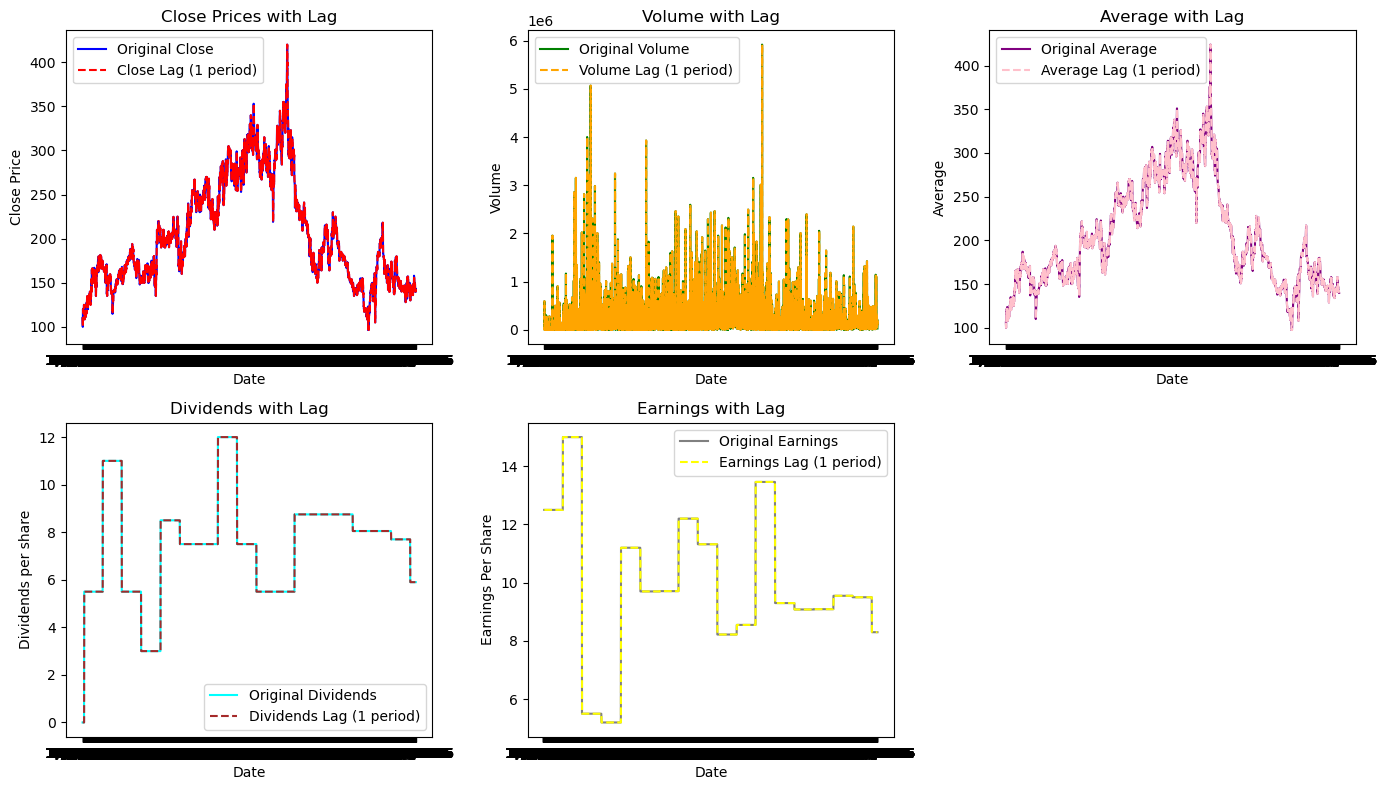

In [24]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 8))

# Original 'Close' and lagged 'Close'
plt.subplot(2, 3, 1)
plt.plot(df8['Date'], df8['Close'], label='Original Close', color='blue')
plt.plot(df8['Date'], df8['Close_Lag'], label='Close Lag (1 period)', linestyle='dashed', color='red')
plt.title('Close Prices with Lag')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Original 'Volume' and lagged 'Volume'
plt.subplot(2, 3, 2)
plt.plot(df8['Date'], df8['Volume'], label='Original Volume', color='green')
plt.plot(df8['Date'], df8['Volume_Lag'], label='Volume Lag (1 period)', linestyle='dashed', color='orange')
plt.title('Volume with Lag')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# Original 'Average' and lagged 'Average'
plt.subplot(2, 3, 3)
plt.plot(df8['Date'], df8['Average'], label='Original Average', color='purple')
plt.plot(df8['Date'], df8['Average_Lag'], label='Average Lag (1 period)', linestyle='dashed', color='pink')
plt.title('Average with Lag')
plt.xlabel('Date')
plt.ylabel('Average')
plt.legend()

# Original 'Dividends per share' and lagged 'Dividends per share'
plt.subplot(2, 3, 4)
plt.plot(df8['Date'], df8['Dividends per share'], label='Original Dividends', color='cyan')
plt.plot(df8['Date'], df8['Dividends_Lag'], label='Dividends Lag (1 period)', linestyle='dashed', color='brown')
plt.title('Dividends with Lag')
plt.xlabel('Date')
plt.ylabel('Dividends per share')
plt.legend()

# Original 'Earnings Per Share' and lagged 'Earnings Per Share'
plt.subplot(2, 3, 5)
plt.plot(df8['Date'], df8['Earnings Per Share'], label='Original Earnings', color='gray')
plt.plot(df8['Date'], df8['Earnings_Lag'], label='Earnings Lag (1 period)', linestyle='dashed', color='yellow')
plt.title('Earnings with Lag')
plt.xlabel('Date')
plt.ylabel('Earnings Per Share')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
# This calculates the percentage change in close prices between the current and lagged periods.
df8['Lagged_Returns'] = df8['Close_Lag'].pct_change() * 100


### Lag Analysis

#### Lag Feature Generation:
1. **Close Prices:**
   - Introduced a lagged feature, `Close_Lag`, capturing historical trends in closing prices.
   - Lagged by 1 period to observe trends over consecutive time points.

2. **Additional Variables:**
   - Lag features created for various financial indicators:
     - `Volume_Lag`: Lagged trading volumes.
     - `Average_Lag`: Lagged average values.
     - `Dividends_Lag`: Lagged dividends per share.
     - `Earnings_Lag`: Lagged earnings per share.

#### Visual Exploration:
- Subplots showcase original and lagged values for each variable.
- Original values plotted alongside lagged values (1 period) represented by dashed lines.

#### Interpretation:
1. **Close Prices with Lag:**
   - A comparison of original closing prices with lagged prices.
   - Provides insights into how closing prices change over consecutive periods.

2. **Volume with Lag:**
   - Examines trends in trading volumes by comparing original and lagged volumes.
   - Helps identify patterns and shifts in trading activity.

3. **Average with Lag:**
   - Highlights trends in average values by comparing original and lagged averages.
   - Useful for understanding changes in average metrics.

4. **Dividends with Lag:**
   - A comparison of original dividend payouts with lagged dividends.
   - Enables the identification of trends in dividend distributions.

5. **Earnings with Lag:**
   - Examines trends in earnings per share by comparing original and lagged earnings.
   - Provides insights into historical earnings patterns.


- Lag analysis allows for the observation of historical trends in various financial indicators.


- This lag analysis enhances the understanding of historical patterns, supporting more informed financial analysis and strategic decision-making based on trends observed in the lagged features.

In [27]:
df8.head()

Unnamed: 0       Date    Open    High    Low  Close  Average  Volume  \
0           0  1/31/2024  104.00  111.00  104.0  110.0   106.00   42000   
1           1  1/30/2024  105.00  105.00  101.0  104.0   104.00   15600   
2           2  1/29/2024  105.00  105.00   99.0  103.5   100.00  596100   
3           3  1/26/2024  116.25  116.25  100.0  100.0   104.50   60500   
4           4  1/25/2024  119.75  120.00  118.0  118.0   118.25    5700   

   Month  Year  ...  Earnings Per Share  Daily_Returns  Rolling_Volatility  \
0      1  2024  ...                 NaN       0.000000                 NaN   
1      1  2024  ...                 NaN      -5.454545                 NaN   
2      1  2024  ...                 NaN      -0.480769                 NaN   
3      1  2024  ...                 NaN      -3.381643                 NaN   
4      1  2024  ...                 NaN      18.000000                 NaN   

   Volatility_Cluster  Close_Lag  Volume_Lag  Average_Lag  Dividends_Lag  \
0                   0        NaN         NaN          NaN            NaN   
1                   0      110.0     42000.0        106.0            0.0   
2                   0      104.0     15600.0        104.0            0.0   
3                   0      103.5    596100.0        100.0            0.0   
4                   1      100.0     60500.0        104.5            0.0   

   Earnings_Lag  Lagged_Returns  
0           NaN             NaN  
1           NaN             NaN  
2           NaN       -5.454545  
3           NaN       -0.480769  
4           NaN       -3.381643  

[5 rows x 26 columns]

In [28]:
null_values = df8.isnull().sum()

# Display columns with null values and their respective counts
print("Columns with Null Values:")
print(null_values[null_values > 0])


Columns with Null Values:
Annual Average Inflation     21
Mean                         12
Amount                      112
Earnings Per Share           21
Rolling_Volatility           20
Close_Lag                     1
Volume_Lag                    1
Average_Lag                   1
Dividends_Lag                 1
Earnings_Lag                 22
Lagged_Returns                2
dtype: int64


In [29]:
# Check for null values in the entire DataFrame
total_nulls = df8.isnull().sum().sum()
print(f"Total Null Values in DataFrame: {total_nulls}")


Total Null Values in DataFrame: 214


In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df8['Date'], df8['Close'], label='Close Price', color='blue')
plt.title('Stock Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


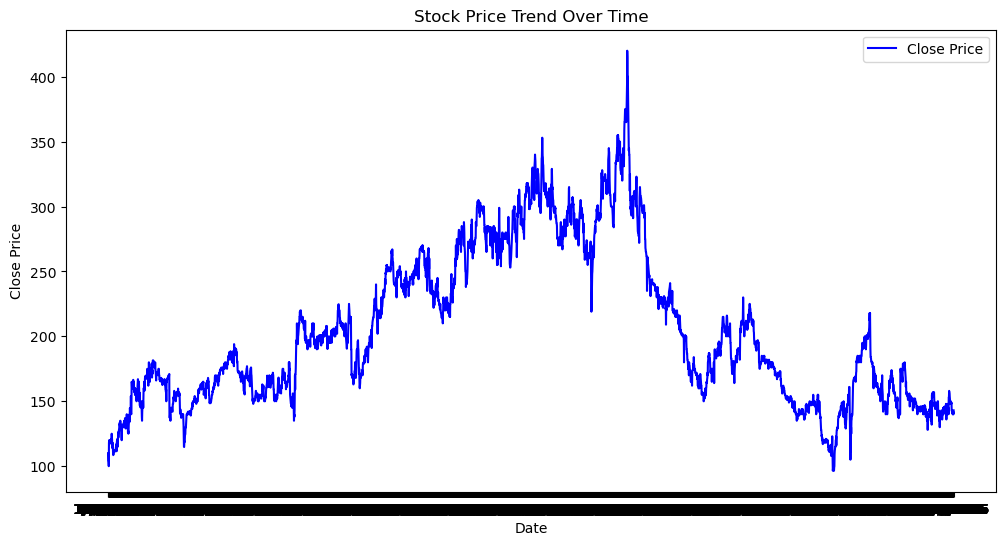

In [31]:
# Visualize the trend of stock prices over the specified period
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df8['Date'], df8['Close'], label='Close Price', color='blue')
plt.title('Stock Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


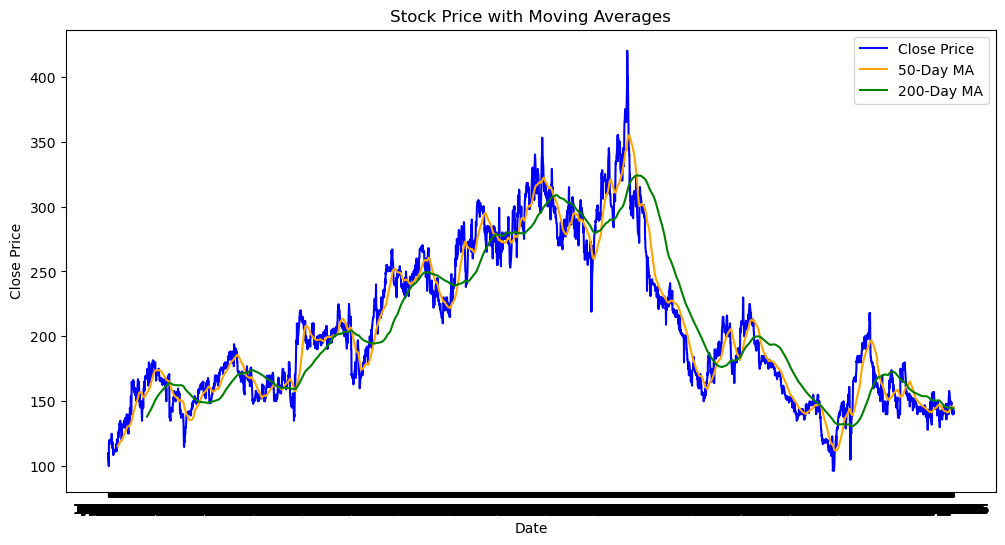

In [30]:
# Calculate and plot moving averages to smooth out short-term fluctuations and identify trends
plt.figure(figsize=(12, 6))
plt.plot(df8['Date'], df8['Close'], label='Close Price', color='blue')
plt.plot(df8['Date'], df8['Close'].rolling(window=50).mean(), label='50-Day MA', color='orange')
plt.plot(df8['Date'], df8['Close'].rolling(window=200).mean(), label='200-Day MA', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


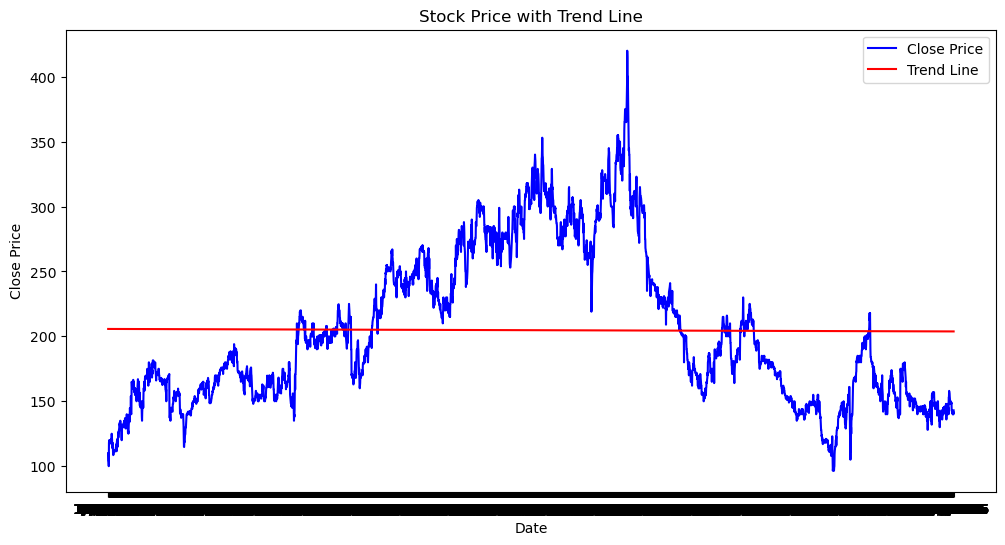

In [32]:
# Use linear regression or other methods to fit trend lines to the data

from numpy.polynomial.polynomial import Polynomial

plt.figure(figsize=(12, 6))
plt.plot(df8['Date'], df8['Close'], label='Close Price', color='blue')

# Fit and plot a trend line using polynomial regression
coefficients = Polynomial.fit(df8.index, df8['Close'], 1).convert().coef
trend_line = coefficients[0] + coefficients[1] * df8.index
plt.plot(df8['Date'], trend_line, label='Trend Line', color='red')

plt.title('Stock Price with Trend Line')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


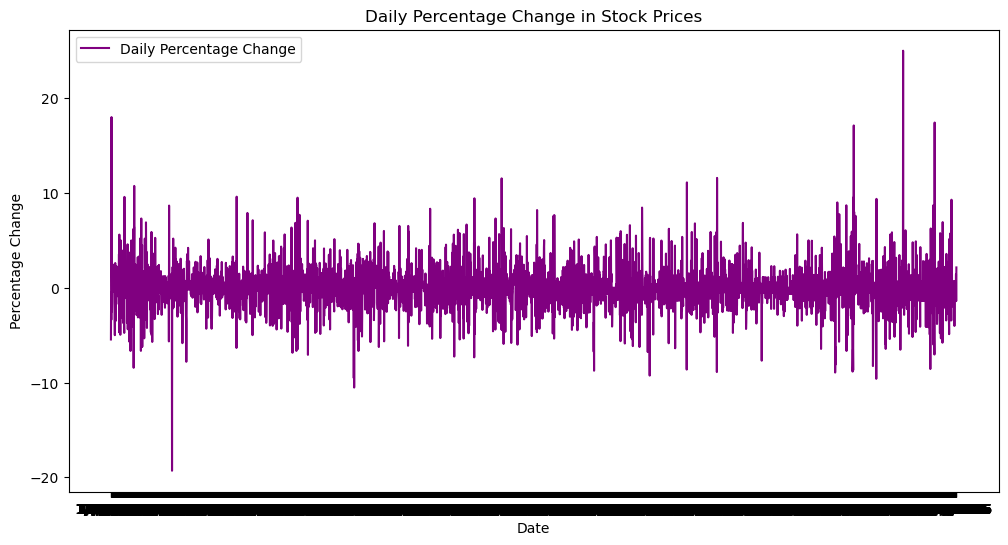

In [33]:
# Calculate and plot the percentage changes in stock prices
plt.figure(figsize=(12, 6))
plt.plot(df8['Date'], df8['Close'].pct_change() * 100, label='Daily Percentage Change', color='purple')
plt.title('Daily Percentage Change in Stock Prices')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()


Certainly! Here's a summarized version suitable for Markdown:

---

### Trend Analysis in Financial Data

**1. Initial Plot:**
   - Provides a visual representation of stock prices changing over time.
   - Observations:
      - Identify general patterns.
      - Recognize upward or downward movements.
      - Understand the overall direction of stock prices.

**2. Moving Averages:**
   - Smooth out short-term fluctuations and highlight longer-term trends.
   - 50-day Moving Average (MA) responds to shorter-term trends.
   - 200-day MA provides insights into extended trends.
   - Crossovers and divergences signal potential trend changes.

**3. Trend Lines (Polynomial Regression):**
   - Mathematical representation of the overall trend in stock prices.
   - Helps in identifying:
      - Underlying direction.
      - Slope of the data.
   - Aids in visualization and quantification of the trend.

**4. Percentage Changes:**
   - Analyze daily percentage changes in stock prices.
   - Reveals periods of significant price movements.
   - Peaks or troughs indicate trends or volatility in the market.

**Summary:**
   - Visualizations aid initial identification.
   - Moving averages offer smoothed insights.
   - Trend lines provide a mathematical model.
   - Percentage changes highlight daily fluctuations.


In [34]:
#Compute the average trading volume over a specified historical period (e.g., 20 or 50 days)average_volume = df8['Volume'].rolling(window=20).mean()
average_volume = df8['Volume'].rolling(window=20).mean()


In [35]:

#Define a threshold or criterion to identify abnormal volume spikes.
# consider volumes exceeding two standard deviations from the average as abnormal.

std_dev = df8['Volume'].rolling(window=20).std()
threshold = average_volume + 2 * std_dev

# Identify abnormal volume spikes
abnormal_spikes = df8['Volume'] > threshold


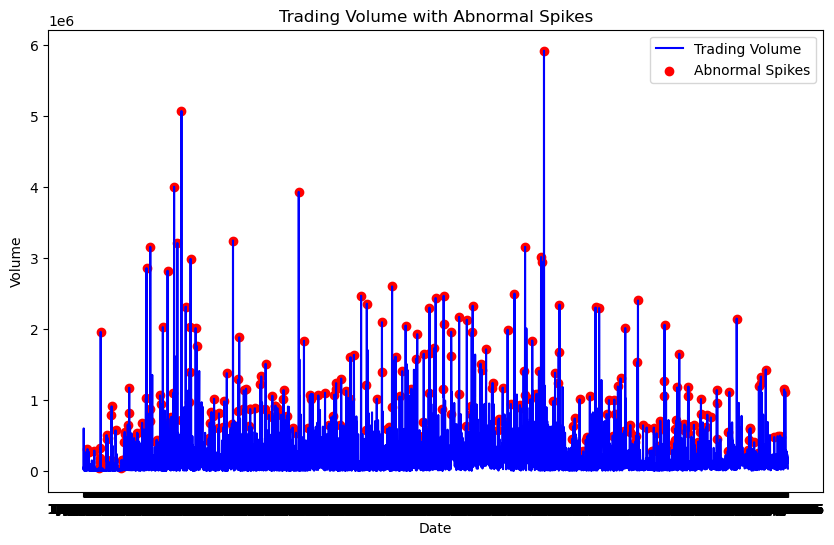

In [36]:
# Plot the trading volume over time and highlight periods with abnormal spikes.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df8['Date'], df8['Volume'], label='Trading Volume', color='blue')
plt.scatter(df8.loc[abnormal_spikes, 'Date'], df8.loc[abnormal_spikes, 'Volume'], color='red', label='Abnormal Spikes')
plt.title('Trading Volume with Abnormal Spikes')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


In [38]:
# Examine the impact of abnormal volume spikes on stock prices or other relevant metrics. 
price_impact = df8.loc[abnormal_spikes, 'Close']


In [39]:
# Conduct statistical tests to validate the significance of abnormal volume spikes
from scipy.stats import zscore

z_scores = zscore(df8['Volume'])
abnormal_spikes_statistical = (z_scores > 2)  # Adjust the threshold as needed


## Analyzing Abnormal Trading Volume Spikes

### 1. Compute Average Trading Volume:
- Calculate the average trading volume using a rolling window over a specified historical period, e.g., 20 days.

### 2. Define Abnormal Volume Criteria:
- Establish criteria for abnormal volume spikes, typically defined as volumes exceeding two standard deviations from the average.

### 3. Identify and Visualize Abnormal Spikes:
- Mark periods with abnormal volume spikes by comparing actual volumes with the defined threshold.
- Visualize the trading volume over time, highlighting abnormal spikes in a plot.

### 4. Assess Impact on Stock Prices:
- Examine the impact of abnormal volume spikes on stock prices or other relevant metrics.

### 5. Statistical Validation (Optional):
- Optionally, conduct statistical tests using z-scores to validate the significance of abnormal volume spikes.

### 6. Interpretation:
- Abnormal volume spikes may indicate heightened market interest or significant events.
- Cross-reference with fundamental news or events to understand the context of increased trading activity.
